**Import needed libraries**

In [233]:
import pandas as pd
import seaborn as sns
import plotly_express as px
from datetime import datetime
import plotly.graph_objects as go
import matplotlib.ticker as ticker
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import calendar

import warnings

warnings.filterwarnings('ignore')

## 1 - Warming up

This project will be centered around the Chicago Crime & selected Census data. Start of by downloading both datasets.

**1.1** Read through the documentation for both datasets. Do this *thoroughly*!

Chicago crime data : https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2

Chicago census data : https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2



**1.2** Now download both datasets as .csv files. You get the option to download by frist clicking on the 'Export' tab. Be mindful that the crime dataset is over 2GB in size, so it might take awhile to download.

Once downloaded, rename the files chicago_crime.csv & chicago_census.csv, respectively, and put them in the same folder as this notebook.

**1.3** Load data. The following reads should now work.

In [70]:
chicago_crime_2001_to_2023_df = pd.read_csv('chicago_crime.csv')
chicago_census_2008_to_2012_df = pd.read_csv('chicago_census.csv')

**1.4** The census data already contains records that apply for the period 2008-2012. Now filter the crime data so that it also contains records only for the years in that period. 

Hint: You probably need to work with the existing Date column. Transform the values from strings to datetime-objects. This operation shouldn't take more than a minute or so using .apply()

**Important:** For the rest of this project, we will only work with data for the year 2008-2012.

In [71]:
def formatDate(day):
    input_us_time = "%m/%d/%Y %I:%M:%S %p"
    output = datetime.strptime(day,input_us_time)
    return output

def barplot_df(df,x:str,y:str,title:str,xlabel:str,ylabel:str, value_of_bar:str,palette="coolwarm"):
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    sns.set_context("talk")  
    sns.barplot(x=x, y=y, data=df, palette=palette)

    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    for index, value in enumerate(df[value_of_bar]):
        plt.text(index, value, str(value), color='black', ha="center", va="bottom")


    sns.despine(left=False, bottom=False)

    plt.grid(axis='x')


    plt.xticks(rotation=45)
  
    plt.tight_layout()

    plt.show()


In [72]:
chicago_crime_2008_to_2012_df = chicago_crime_2001_to_2023_df[(chicago_crime_2001_to_2023_df["Year"] >= 2008) & (chicago_crime_2001_to_2023_df["Year"] <= 2012) ].reset_index(drop=True)

In [73]:
chicago_crime_2008_to_2012_df["Date"] = pd.to_datetime(chicago_crime_2008_to_2012_df["Date"], format="%m/%d/%Y %I:%M:%S %p") 


# 2 - Cleaning up the mess

**Note:** The rest of the problems don't really require you to finish this section - you could revisit these questions at a later time. 

Bear in mind though that the numbers you aquire in the problems ahead may or may not change a bit, depending on how you choose to treat the duplicates and missing values here.  

In [74]:
def barplot_missing_values(data_frame):
    
    df_null_counts = data_frame.isnull().sum()
    df_null_counts = df_null_counts[df_null_counts > 0 ]  
        
    plt.figure(figsize=(15, 8))
    
    bars = sns.barplot(x=df_null_counts.index, y=df_null_counts.values, palette='coolwarm_r')

    for bar in bars.patches:
        bar_height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, bar_height, f'{int(bar_height)}',
                 ha='center', va='bottom', fontsize=10, color='black')

    plt.title("Missing Values in Each Column", fontsize=18, weight='bold')
    plt.xlabel("Columns", fontsize=14)
    plt.ylabel("Number of Missing Values", fontsize=14)
    
    sns.despine(left=True, bottom=True)  
    plt.xticks(rotation=45, ha='right', fontsize=12)  
    plt.yticks(fontsize=12)
    
    plt.tight_layout()

    plt.show()


---

**2.1** How many duplicated rows are there in crime data set? If there are any, remove them.

In [75]:
duplicates =chicago_crime_2008_to_2012_df.duplicated().sum()
print(f"There are {duplicates} duplicates in the chicage crime")

There are 0 duplicates in the chicage crime


---


**2.2** What columns in the crime dataset has missing values, and how many are they?

In [76]:
non_values =  chicago_crime_2008_to_2012_df.isnull().sum()

There are 83143 missing values in total, take a look at the chart below


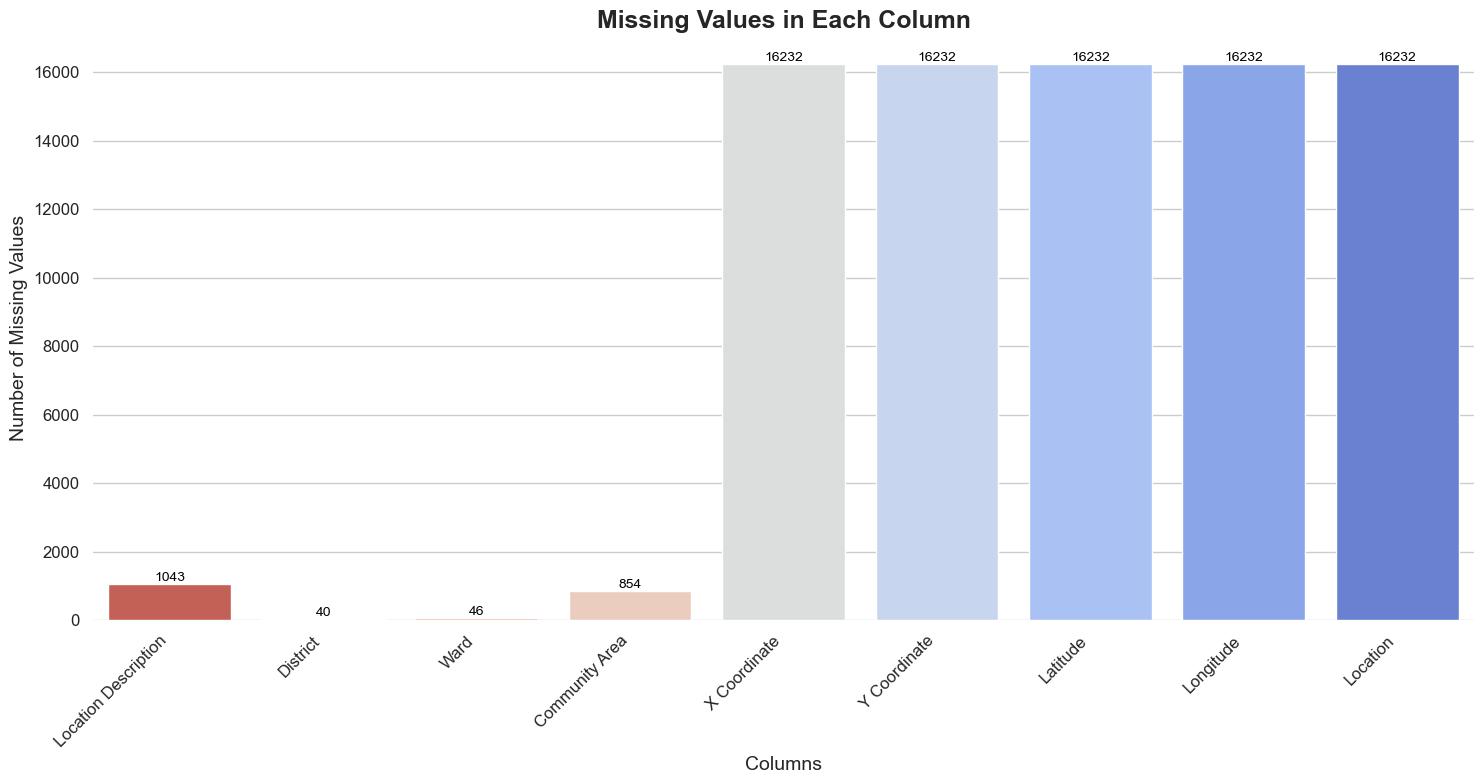

In [77]:
missing_values = non_values[non_values > 0]
print(f"There are {missing_values.sum()} missing values in total, take a look at the chart below")
barplot_missing_values(chicago_crime_2008_to_2012_df)

---

**2.3*** Now, for all the columns with missing values you've identified, chose on of the following:

        a) remove the entire row with the missing value
        b) replace the missing values with another suitable value
        c) don't do anything, leave the missing values as is

All options above are completely valid! However, I want you to, for all columns with missing values, **clearly** argue for why you chose to do what you do.

I have chossen to keep the missing values becasue even if some crimes are missing details they still have som data that conludes that the crime has still occured and removing then or altering could change the data whole.

---

## 3 - The Birds Eye

**3.1** Do some exploratory analysis on the dataset and try to get a sense of the data you're working with.

In [78]:
# no need to provide an answer to this questions in the notebook you send in

---

**3.2** How many crimes records exists for the period 2008-2012, in total?

In [79]:
print(f"There are {len(chicago_crime_2008_to_2012_df):,.0f} crime recorded in Chicago between 2008-2019")

There are 1,878,855 crime recorded in Chicago between 2008-2019


---

**3.3** What's the number of recorded crimes for each of the years, individually? 

In [80]:
chicago_crime_recorded_2008_to_2012_serie = chicago_crime_2008_to_2012_df['Year'].value_counts()
chicago_crime_recorded_2008_to_2012_dt = pd.DataFrame(chicago_crime_recorded_2008_to_2012_serie).reset_index()

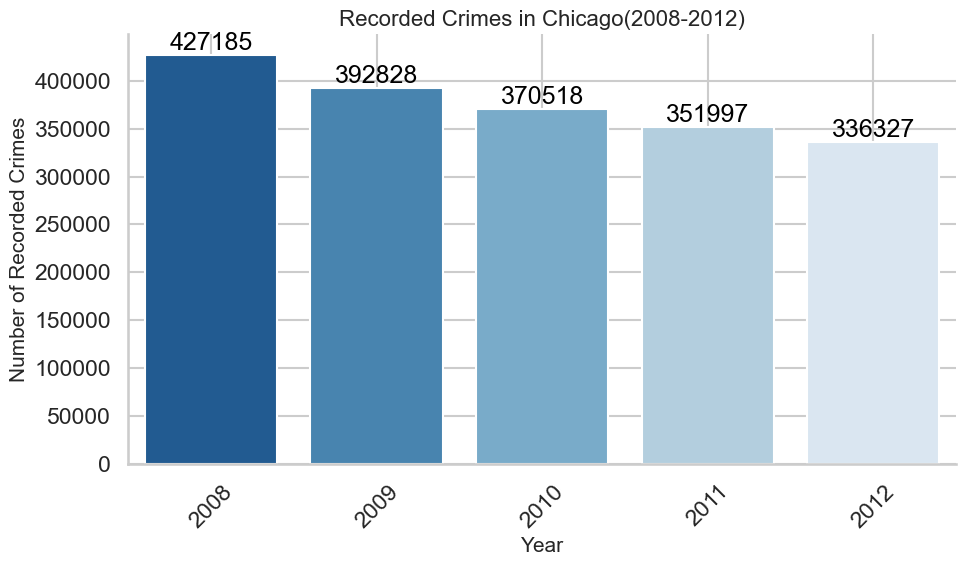

In [81]:
barplot_df(chicago_crime_recorded_2008_to_2012_dt,"Year","count","Recorded Crimes in Chicago(2008-2012)","Year","Number of Recorded Crimes","count","Blues_r")

---

**3.4** Has the number of recorded crimes increased, decreased or remained stable throughout the years?

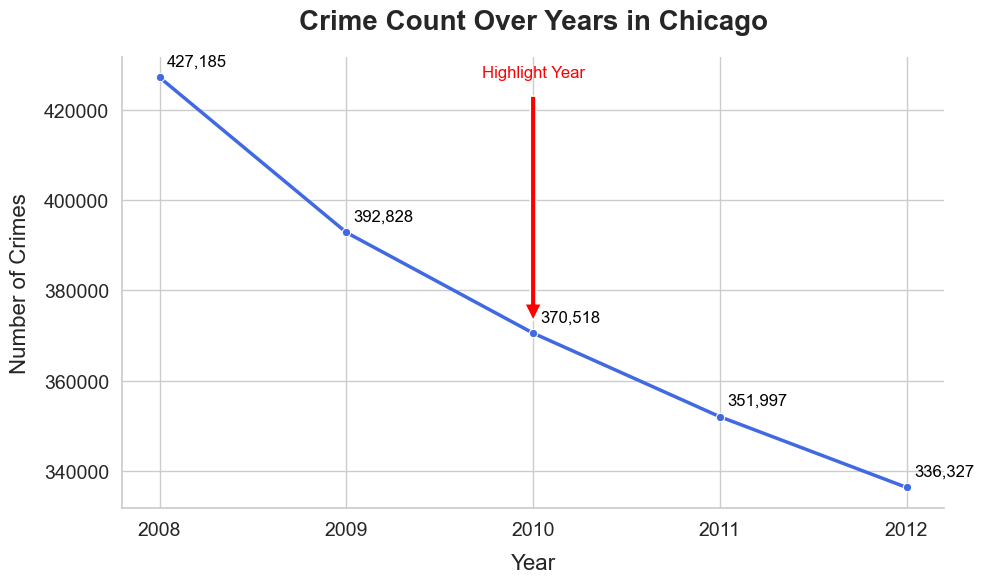

In [82]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=chicago_crime_recorded_2008_to_2012_dt, y="count", x="Year",
                  marker="o", color="royalblue", linewidth=2.5)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))  
ax.set_title('Crime Count Over Years in Chicago', fontsize=16, fontweight="bold")
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Number of Crimes', fontsize=14)

ax.set_title('Crime Count Over Years in Chicago', fontsize=20, fontweight="bold", pad=20)
ax.set_xlabel('Year', fontsize=16, labelpad=10)
ax.set_ylabel('Number of Crimes', fontsize=16, labelpad=10)

ax.tick_params(labelsize=14)

for x, y in zip(chicago_crime_recorded_2008_to_2012_dt['Year'], chicago_crime_recorded_2008_to_2012_dt['count']):
    ax.text(x+0.2, y+2000, f'{y:,.0f}', color='black', ha='center', va='bottom')

highlight = 2010
ax.annotate('Highlight Year', xy=(highlight, chicago_crime_recorded_2008_to_2012_dt.loc[chicago_crime_recorded_2008_to_2012_dt['Year'] == highlight, 'count']),
            xytext=(highlight, chicago_crime_recorded_2008_to_2012_dt['count'].max() + 50),
            arrowprops=dict(facecolor='red', shrink=0.05),
            ha='center', color='red')


sns.despine()

plt.tight_layout()
plt.show()


Here you can see that it's decresing over time and i have higlighet 2010 becasue it is after recession 

---

**3.5** By how many percentage points has the crime rate increased/decreased during the period? 

Hint: You only need to compare the number of crime records from 2008 with the number of crime records from 2012.

In [83]:
procentage_decreased = round((chicago_crime_recorded_2008_to_2012_serie.values[0] - chicago_crime_recorded_2008_to_2012_serie.values[-1] )/ chicago_crime_recorded_2008_to_2012_serie.values[0] * 100
,2)
print(f"The crime rate has deacreased with {procentage_decreased}% from 2008 to 2012")

The crime rate has deacreased with 21.27% from 2008 to 2012


---

**3.6** Which primary crime types have increasing crime record numbers, and which ones have decreasing, when comparing 2008 to 2012?

In [84]:
chicago_crime_2008_df= chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Year"] == 2008]
chicago_crime_2012_df= chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Year"] == 2012]


In [85]:
chicago_crime_2008_serie_primary_type = chicago_crime_2008_df["Primary Type"].value_counts()
chicago_crime_2008_per_type_df = pd.DataFrame(chicago_crime_2008_serie_primary_type).reset_index()


In [86]:
chicago_crime_2012_serie_primary_type = chicago_crime_2012_df["Primary Type"].value_counts()
chicago_crime_2012_per_type_df = pd.DataFrame(chicago_crime_2012_serie_primary_type).reset_index()


In [87]:
chicago_crime_2012_per_type_df.rename(columns={"count": "Count 2012"}, inplace=True)
chicago_crime_2008_per_type_df.rename(columns={"count": "Count 2008"}, inplace=True)


In [88]:
merged_08_and_12 = pd.merge(chicago_crime_2008_per_type_df,chicago_crime_2012_per_type_df, on="Primary Type")


In [89]:
difference_08_and_12 = merged_08_and_12["Count 2012"] - merged_08_and_12["Count 2008"] 

In [90]:
merged_08_and_12["Difference 2008-2012"] = difference_08_and_12


In [91]:
merged_08_and_12 = merged_08_and_12.sort_values(by="Difference 2008-2012", ascending=False)

In [92]:
merged_08_and_12['Percentage Change'] = round(((merged_08_and_12['Count 2012'] - merged_08_and_12['Count 2008']) / merged_08_and_12['Count 2008']) * 100,2)

In [93]:
df_positive = merged_08_and_12[merged_08_and_12['Difference 2008-2012'] > 0]
df_negative = merged_08_and_12[merged_08_and_12['Difference 2008-2012'] < 0]

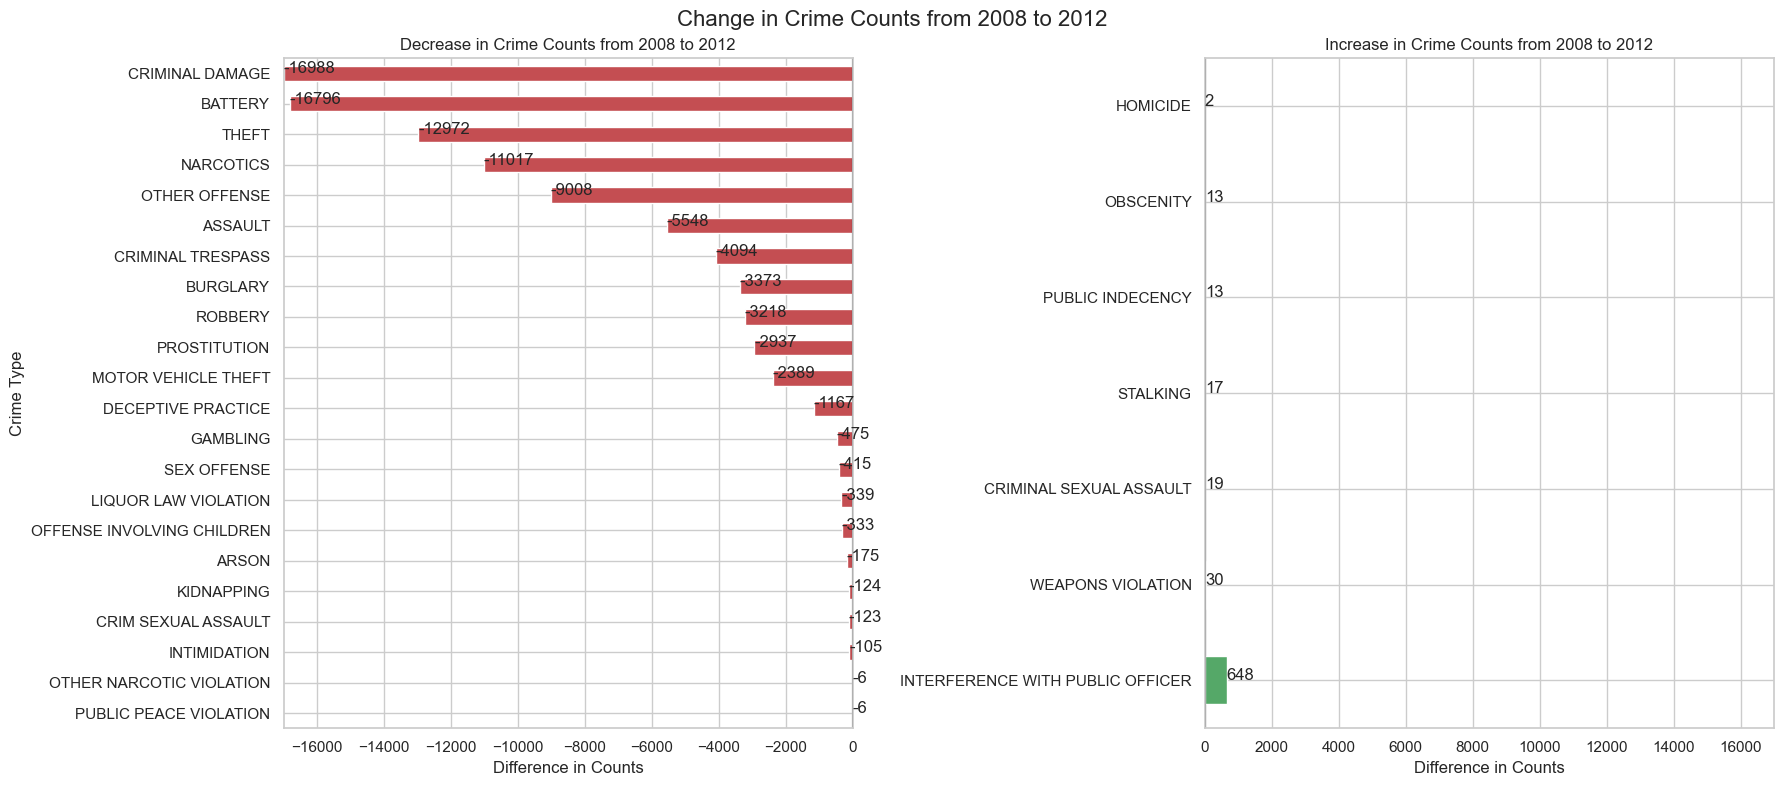

In [94]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

max_range = max(df_negative['Difference 2008-2012'].abs().max(), df_positive['Difference 2008-2012'].max())
ax1.set_xlim(-max_range, 0)  
ax2.set_xlim(0, max_range)   

df_negative.plot(kind='barh', x='Primary Type', y='Difference 2008-2012', ax=ax1, color='r', legend=False)
ax1.set_title('Decrease in Crime Counts from 2008 to 2012')
ax1.set_xlabel('Difference in Counts')
ax1.set_ylabel('Crime Type')
for index, value in enumerate(df_negative['Difference 2008-2012']):
    ax1.text(value, index, str(value))

df_positive.plot(kind='barh', x='Primary Type', y='Difference 2008-2012', ax=ax2, color='g', legend=False)
ax2.set_title('Increase in Crime Counts from 2008 to 2012')
ax2.set_xlabel('Difference in Counts')
ax2.set_ylabel('')
for index, value in enumerate(df_positive['Difference 2008-2012']):
    ax2.text(value, index, str(value))

ax1.axvline(0, color='black', linewidth=1.5)
ax2.axvline(0, color='black', linewidth=1.5)

fig.suptitle('Change in Crime Counts from 2008 to 2012', fontsize=16)

plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()


  

---



**3.7*** Which are the top 5 primary crime types in terms of increasing crime records between 2008 and 2012? Which are the top 5 primary crime types in terms of *percentual* increase? 

Are the top 5 lists you just produced different? If so, why?   

In [95]:
sorted_by_increase_merged_08_and_12 = merged_08_and_12.sort_values(by="Difference 2008-2012",ascending=False)

In [96]:
filter_merged_08_and_12_positive=sorted_by_increase_merged_08_and_12["Difference 2008-2012"] > 0
sorted_by_increase_merged_08_and_12= sorted_by_increase_merged_08_and_12[filter_merged_08_and_12_positive]


In [97]:
top_5_highest_merged_08_and_12 = sorted_by_increase_merged_08_and_12.head(5)
highest_percent_merged_08_and_12 = merged_08_and_12.sort_values(by="Percentage Change",ascending=False)
top_5_highest_percent_merged_08_and_12 =highest_percent_merged_08_and_12.head(5)

The plot shows differently because of the count of crimes dont take in fact the actual increase of it starting value,
 which percentage do that is why the differs 


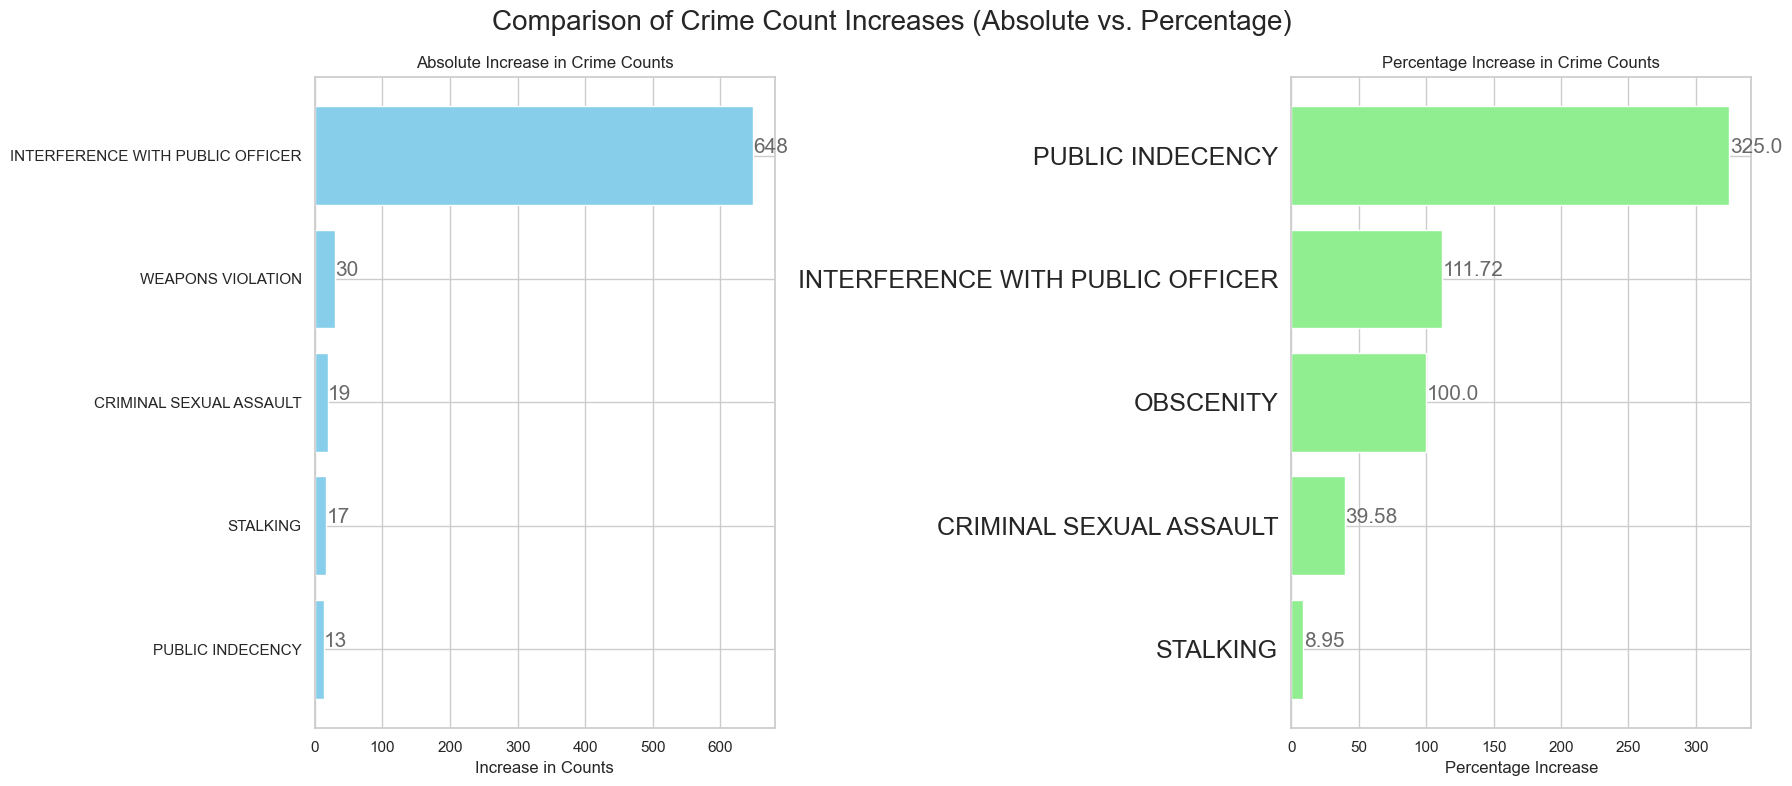

In [98]:
print(f"The plot shows differently because of the count of crimes dont take in fact the actual increase of it starting value,\n which percentage do that is why the differs ")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw={'width_ratios': [1, 1]})

ax1.barh(top_5_highest_merged_08_and_12['Primary Type'], top_5_highest_merged_08_and_12['Difference 2008-2012'], color='skyblue')
ax1.set_title('Absolute Increase in Crime Counts')
ax1.set_xlabel('Increase in Counts')
ax1.invert_yaxis()   
for i in ax1.patches:
    ax1.text(i.get_width()+.3, i.get_y()+.38, \
             str(round((i.get_width()), 2)), fontsize=15, color='dimgrey')

ax2.barh(top_5_highest_percent_merged_08_and_12['Primary Type'], top_5_highest_percent_merged_08_and_12['Percentage Change'], color='lightgreen')
ax2.set_title('Percentage Increase in Crime Counts')
ax2.set_xlabel('Percentage Increase')
ax2.invert_yaxis()  
for i in ax2.patches:
    ax2.text(i.get_width()+.3, i.get_y()+.38, \
             str(round((i.get_width()), 2)), fontsize=15, color='dimgrey')

plt.yticks(fontsize=18) 
fig.suptitle('Comparison of Crime Count Increases (Absolute vs. Percentage)', fontsize=20)
plt.tight_layout()  


plt.show()


---

# 4 - Chicago Police Departement performance assessment

**4.1** How many recorded crimes have in total led to an arrest? What's the corresponding arrest percentage?

In [99]:
chicago_crime_2008_to_2012_arrests_df= chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Arrest"] == True]

In [100]:
arrest_percentage= round((len(chicago_crime_2008_to_2012_arrests_df) /len(chicago_crime_2008_to_2012_df) ) * 100,2)

In [101]:
print(f"Total arrest of {len(chicago_crime_2008_to_2012_arrests_df)} with an corresponding arrest {arrest_percentage}%")

Total arrest of 508367 with an corresponding arrest 27.06%


---

**4.2** Has the arrest rate percentage been increasing, decreasing or remained stable over these years?

In [102]:
merged_years_dt= pd.merge(chicago_crime_2008_to_2012_df["Year"].value_counts(),chicago_crime_2008_to_2012_arrests_df["Year"].value_counts(), on="Year")

In [103]:
merged_years_dt = merged_years_dt.reset_index().rename(columns={"count_x": "Total_crime", "count_y":"True_arrest"})

In [104]:
merged_years_dt["%_per_year"] = round((merged_years_dt["True_arrest"] / merged_years_dt["Total_crime"]) * 100,2 )


The Crime arrest in percentage has been at a stable range from 25 to 28 there in between


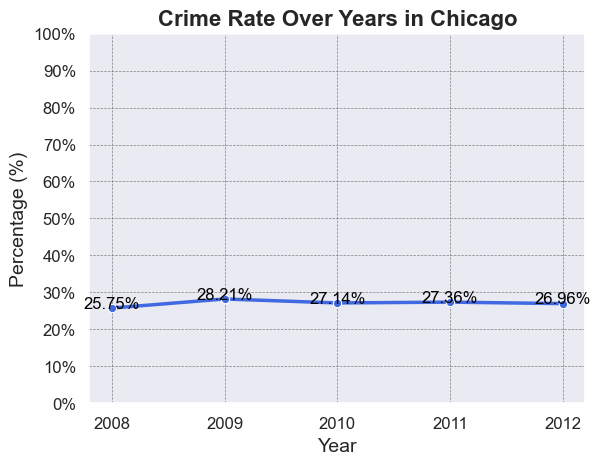

In [105]:
print("The Crime arrest in percentage has been at a stable range from 25 to 28 there in between")

sns.set_theme(style="darkgrid")

ax = sns.lineplot(data=merged_years_dt, y="%_per_year", x="Year", marker="o", color="royalblue", linewidth=2.5)
ax.set_xticks(merged_years_dt['Year'])
ax.set_yticks(range(0, 101, 10))  

plt.ylabel('Percentage (%)', fontsize=14)  

ax.yaxis.set_major_formatter(ticker.PercentFormatter())

for x, y in zip(merged_years_dt['Year'], merged_years_dt['%_per_year']):
    plt.text(x, y, '{:.2f}%'.format(y), color='black', ha="center")

plt.title('Crime Rate Over Years in Chicago', fontsize=16, fontweight="bold")  
plt.xlabel('Year', fontsize=14)

plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')

plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)

plt.show()


---

**4.3** For the Year 2011, which month has the highest arrest percentage?

In [106]:
chicago_crime_2011_df = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Year"] == 2011].reset_index()
chicago_crime_2011_arrests_df = chicago_crime_2011_df[chicago_crime_2011_df["Arrest"] == True]

In [107]:
chicago_crime_2011_month_df=pd.DataFrame(pd.DatetimeIndex(chicago_crime_2011_df["Date"]).month_name().value_counts()).reset_index()
chicago_crime_2011_month_arrest_df= pd.DataFrame(pd.DatetimeIndex(chicago_crime_2011_arrests_df["Date"]).month_name().value_counts()).reset_index()

In [108]:
chicago_total_crime_2011=pd.merge(chicago_crime_2011_month_df,chicago_crime_2011_month_arrest_df, on="Date").rename(columns={"Date":"month","count_x": "crimes","count_y":"arrests"})

In [109]:
chicago_total_crime_2011["percent"] = (chicago_total_crime_2011["arrests"] / chicago_total_crime_2011["crimes"]) * 100   

In [110]:
chicago_total_crime_2011 = chicago_total_crime_2011.sort_values(by="percent",ascending=False).reset_index(drop=True)
chicago_total_crime_2011["month"] = chicago_total_crime_2011["month"] 

The month with highest arrest percentage is: March with 29.3%


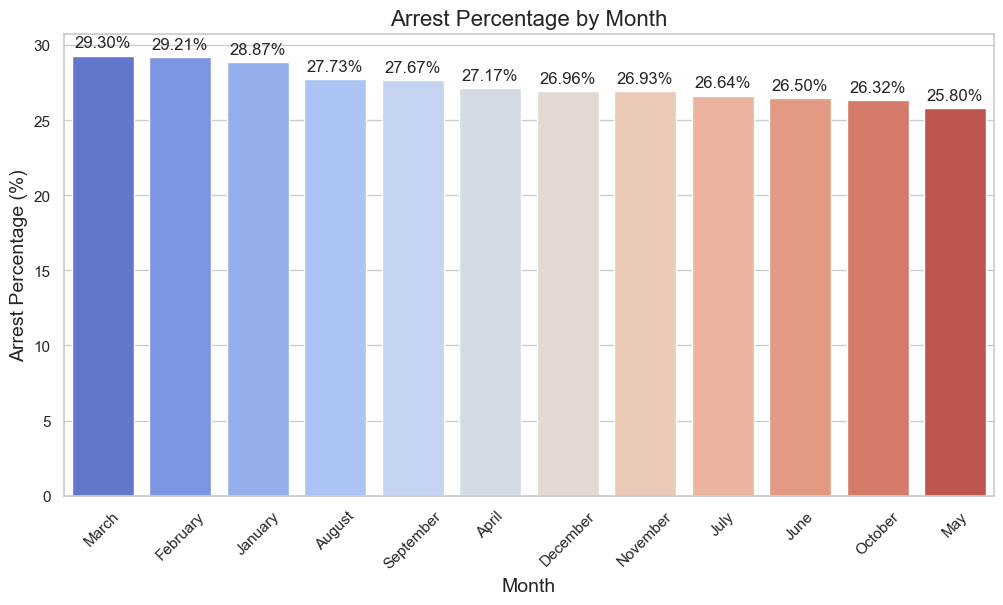

In [111]:
print(f"The month with highest arrest percentage is: {chicago_total_crime_2011.head(1).month.sum()} with {round(chicago_total_crime_2011.head(1).percent.sum(),2)}%")
sns.set_style('whitegrid')


plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=chicago_total_crime_2011, x='month', y='percent', palette='coolwarm')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f') + '%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')

plt.title('Arrest Percentage by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Arrest Percentage (%)', fontsize=14)
plt.xticks(rotation=45)

plt.show()


**4.4** For the same year, and the particular month of you've identified in question 2.3, which primary crime type has the highest number of arrests?

In [112]:
chicago_crime_2011_arrests_march_df= chicago_crime_2011_arrests_df[pd.DatetimeIndex(chicago_crime_2011_arrests_df["Date"]).month == 3]

In [113]:
primary_type_arrests_df= pd.DataFrame(chicago_crime_2011_arrests_march_df["Primary Type"].value_counts()).reset_index()

Primary crime type with highest arrests is NARCOTICS with 3747 arrests cases


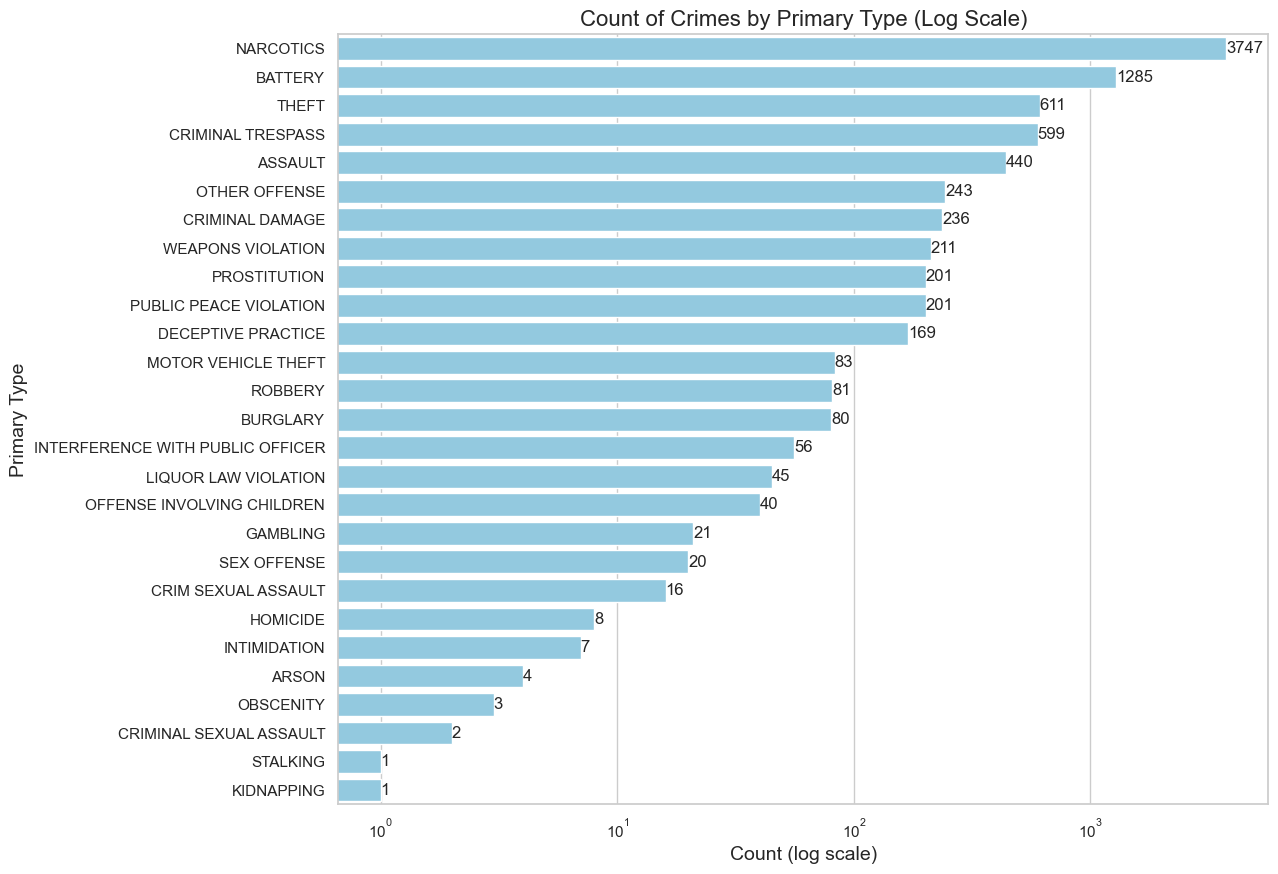

In [114]:
print(f"Primary crime type with highest arrests is {primary_type_arrests_df.head(1)['Primary Type'].values[0]} with {primary_type_arrests_df.head(1)['count'].values[0]} arrests cases")

plt.figure(figsize=(12, 10))
barplot = sns.barplot(data=primary_type_arrests_df, y='Primary Type', x='count', color='skyblue')

plt.xscale('log')

plt.xlabel('Count (log scale)', fontsize=14)
plt.ylabel('Primary Type', fontsize=14)
plt.title('Count of Crimes by Primary Type (Log Scale)', fontsize=16)

plt.gca()

for p in barplot.patches:
    width = p.get_width()  
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2, 
             '{:1.0f}'.format(width),  
             va='center')  
plt.show()



---

**4.5*** Which primary crime categories enjoy the highest percentual increase in number of arrests, while comparing 2008 and 2012? At what location do these arrest most often occur? Also answer, for the same prime categories, at what location the crimes that dont lead to an arrest most often occur. Can you find some interesting relations?

In [115]:
chicago_crime_2012_arrests_true_df=chicago_crime_2012_df[chicago_crime_2012_df["Arrest"] == True]
chicago_crime_2012_arrests_false_df= chicago_crime_2012_df[chicago_crime_2012_df["Arrest"] == False]

chicago_crime_2008_arrests_true_df= chicago_crime_2008_df[chicago_crime_2008_df["Arrest"] == True]
chicago_crime_2008_arrests_false_df= chicago_crime_2008_df[chicago_crime_2008_df["Arrest"] == False]

In [116]:
chicago_crime_2012_arrests_true_type_df=chicago_crime_2012_arrests_true_df["Primary Type"].value_counts()
chicago_crime_2008_arrests_true_type_df=chicago_crime_2008_arrests_true_df["Primary Type"].value_counts()
merged_08_12_true_arrests_df = pd.merge(chicago_crime_2008_arrests_true_type_df,chicago_crime_2012_arrests_true_type_df, left_index=True, right_index=True,suffixes=['_2008', '_2012']).reset_index()

In [117]:
merged_08_12_true_arrests_df =merged_08_12_true_arrests_df.rename(columns={"count_2008": "arrests_2008","count_2012": "arrests_2012"})
merged_08_12_true_arrests_df["increase%"] = round(((merged_08_12_true_arrests_df["arrests_2012"] - merged_08_12_true_arrests_df["arrests_2008"])/merged_08_12_true_arrests_df["arrests_2008"]) *100,1)

In [118]:
filter_postive = merged_08_12_true_arrests_df["increase%"] > 0
merged_08_12_true_arrests_sorted_postive_df = merged_08_12_true_arrests_df[filter_postive].sort_values(by="increase%", ascending=False)

In [119]:
highest_percent_primary_crime = merged_08_12_true_arrests_sorted_postive_df.value_counts()
highest_percent_primary_crime_list = highest_percent_primary_crime.index.get_level_values(0).to_list()

In [120]:
true_arrest_12_df = chicago_crime_2012_arrests_true_df[chicago_crime_2012_arrests_true_df["Primary Type"].isin(highest_percent_primary_crime_list)]
false_arrest_12_df = chicago_crime_2012_arrests_false_df[chicago_crime_2012_arrests_false_df["Primary Type"].isin(highest_percent_primary_crime_list)]

In [121]:
counted_false_df = false_arrest_12_df.groupby(['Primary Type', 'Location Description']).size().reset_index(name='Count')
counted_true_df = true_arrest_12_df.groupby(['Primary Type', 'Location Description']).size().reset_index(name='Count')

In [122]:
pivot_true = counted_true_df.pivot_table(index='Primary Type', columns='Location Description', values='Count',).fillna(0)
pivot_false = counted_false_df.pivot_table(index='Primary Type', columns='Location Description', values='Count',).fillna(0)

In [123]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [124]:
max_color_scale_value = max(pivot_true.max().max(), pivot_false.max().max())

custom_color_scale = [
    [0, 'rgba(255, 255, 255, 1)'],
    [1/max_color_scale_value, 'rgba(255, 255, 255, 1)'],  
    [1/max_color_scale_value, 'rgba(0, 0, 255, 0.2)'],  
    [1.0, 'rgba(0, 0, 255, 1)']  
]

fig = make_subplots(rows=1, cols=2, shared_yaxes=True, subplot_titles=("Arrests=True", "Arrests=False"))

fig.add_trace(
    go.Heatmap(z=pivot_true.values, x=pivot_true.columns, y=pivot_true.index, 
               coloraxis="coloraxis1"), 
    row=1, col=1
)

fig.add_trace(
    go.Heatmap(z=pivot_false.values, x=pivot_false.columns, y=pivot_false.index, 
               coloraxis="coloraxis2"),
    row=1, col=2
)

fig.update_layout(
    coloraxis1=dict(colorscale=custom_color_scale, cmin=0, cmax=max_color_scale_value),
    coloraxis2=dict(colorscale=custom_color_scale, cmin=0, cmax=max_color_scale_value, showscale=True),
    title_text='Heatmap of Crime Types by Location Description',
    height=600,  
    width=1200,  
)

fig.show()
print(f"The interesting by comparing arrest on false and true Deceptive Practice most arrest and most non arrest \n PUBLIC INDECENCY does not have any record of crimes where arrests is false.\n  Some places are in both heatmaps which would suggest high crimes in the locations ")

The interesting by comparing arrest on false and true Deceptive Practice most arrest and most non arrest 
 PUBLIC INDECENCY does not have any record of crimes where arrests is false.
  Some places are in both heatmaps which would suggest high crimes in the locations 


# 5 - Troubles at home

**5.1** How many recorded crimes are domestic?

In [125]:
domestic_true_08_to_12_df = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Domestic"]== True]

In [126]:
domestic_count= domestic_true_08_to_12_df["Domestic"].value_counts()

In [127]:
print(f"There are {domestic_count.sum()} {domestic_count.index.name} recorded crimes")

There are 309749 Domestic recorded crimes


---

**5.2** How many recorded crimes, of the primary type *offense involving children*, are domestic?

In [128]:
domestic_children_08_to_12_df= domestic_true_08_to_12_df[domestic_true_08_to_12_df["Primary Type"] == "OFFENSE INVOLVING CHILDREN"]
all_domestic_children_08_to_12_df= chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Primary Type"] == "OFFENSE INVOLVING CHILDREN"]

In [129]:
domestic_children_crimes= domestic_children_08_to_12_df["Primary Type"].value_counts()

In [130]:
print(f"There are {domestic_children_crimes.sum()} recorded crimes with Primary type: {domestic_children_crimes.index[0]} ")

There are 10921 recorded crimes with Primary type: OFFENSE INVOLVING CHILDREN 


---

**5.3** How much more likely is it that an offense involving children is domestic?

In [131]:
chance_domestic_children=round((domestic_children_crimes.sum() / all_domestic_children_08_to_12_df["Primary Type"].value_counts().sum()) * 100,1)

In [132]:
print(f" It is {chance_domestic_children}% more likely offense involves children")

 It is 86.1% more likely offense involves children


---

**5.4** What's the worst weekday in terms of number of domestic offenses involving children? How does it compare to the other weekdays?

In [133]:
domestic_children_weekday_serie = pd.DatetimeIndex(domestic_children_08_to_12_df["Date"]).day_name().value_counts()

In [134]:
domestic_children_weekday_df= pd.DataFrame(domestic_children_weekday_serie).reset_index().rename(columns={"Date":"weekDay","count":"crimes"})

Friday is the worst weekday with 2023 crimes 
 Look down here at table:


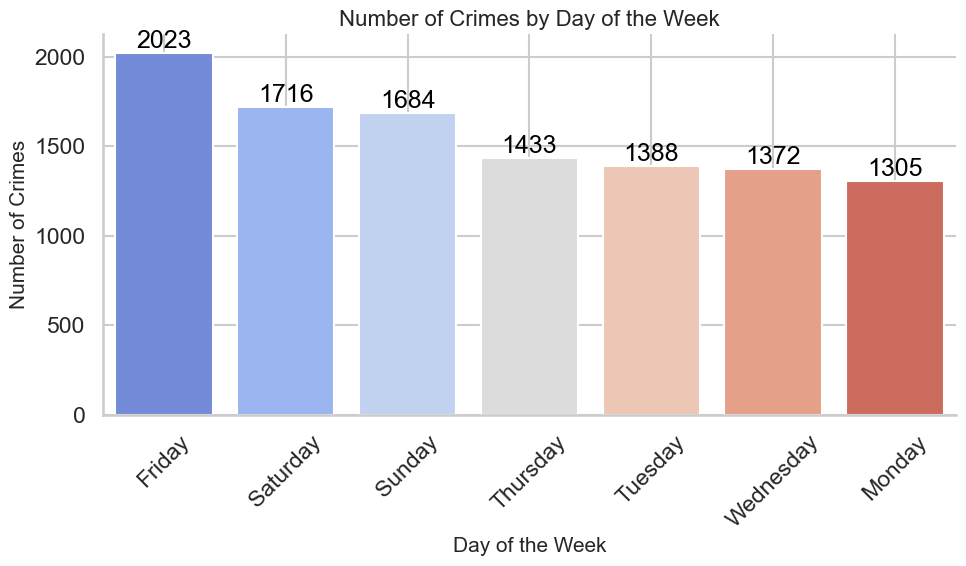

In [135]:
print(f"{domestic_children_weekday_df.head(1).weekDay.sum()} is the worst weekday with {domestic_children_weekday_df.head(1).crimes.sum()} crimes \n Look down here at table:")

barplot_df(domestic_children_weekday_df,'weekDay','crimes','Number of Crimes by Day of the Week','Day of the Week', 'Number of Crimes','crimes')

---

**5.5** What's the distribution, in terms of recorded crimes, for domestic *and* sexual offenses involving children? What's the arrest percentage for each? 

In [136]:
child_sex_crimes_08_12_df = domestic_true_08_to_12_df[domestic_true_08_to_12_df["Primary Type"] == "OFFENSE INVOLVING CHILDREN"].reset_index()
child_sex_crimes_08_12_df =child_sex_crimes_08_12_df[child_sex_crimes_08_12_df["Description"].str.contains("SEX")]
total_crimes_child_08_12 = child_sex_crimes_08_12_df["Description"].value_counts()


In [137]:
arrest_false_df= child_sex_crimes_08_12_df[child_sex_crimes_08_12_df["Arrest"] == False]
arrest_false_serie = arrest_false_df["Description"].value_counts()

child_arrests_crime_08_12_df = child_sex_crimes_08_12_df[child_sex_crimes_08_12_df["Arrest"] == True]
child_arrests_crime_08_12_serie = child_arrests_crime_08_12_df["Description"].value_counts()

In [138]:
arrest_true = child_arrests_crime_08_12_df.shape[0]

arrest_false = arrest_false_serie.sum()
arrest_percentage = round(child_sex_crimes_08_12_df.groupby('Description')['Arrest'].mean() * 100,2)

true_arrest_percentage = round((child_arrests_crime_08_12_serie / child_arrests_crime_08_12_serie.sum()) *100,2)


In [139]:


summary_df = pd.DataFrame({
    'Total_Crimes': total_crimes_child_08_12,
    'Non_Arrests':arrest_false_serie,
    'Arrests':child_arrests_crime_08_12_serie,
    'Arrest Percentage %': arrest_percentage,
    "Arrest(100%)": true_arrest_percentage
}).reset_index()

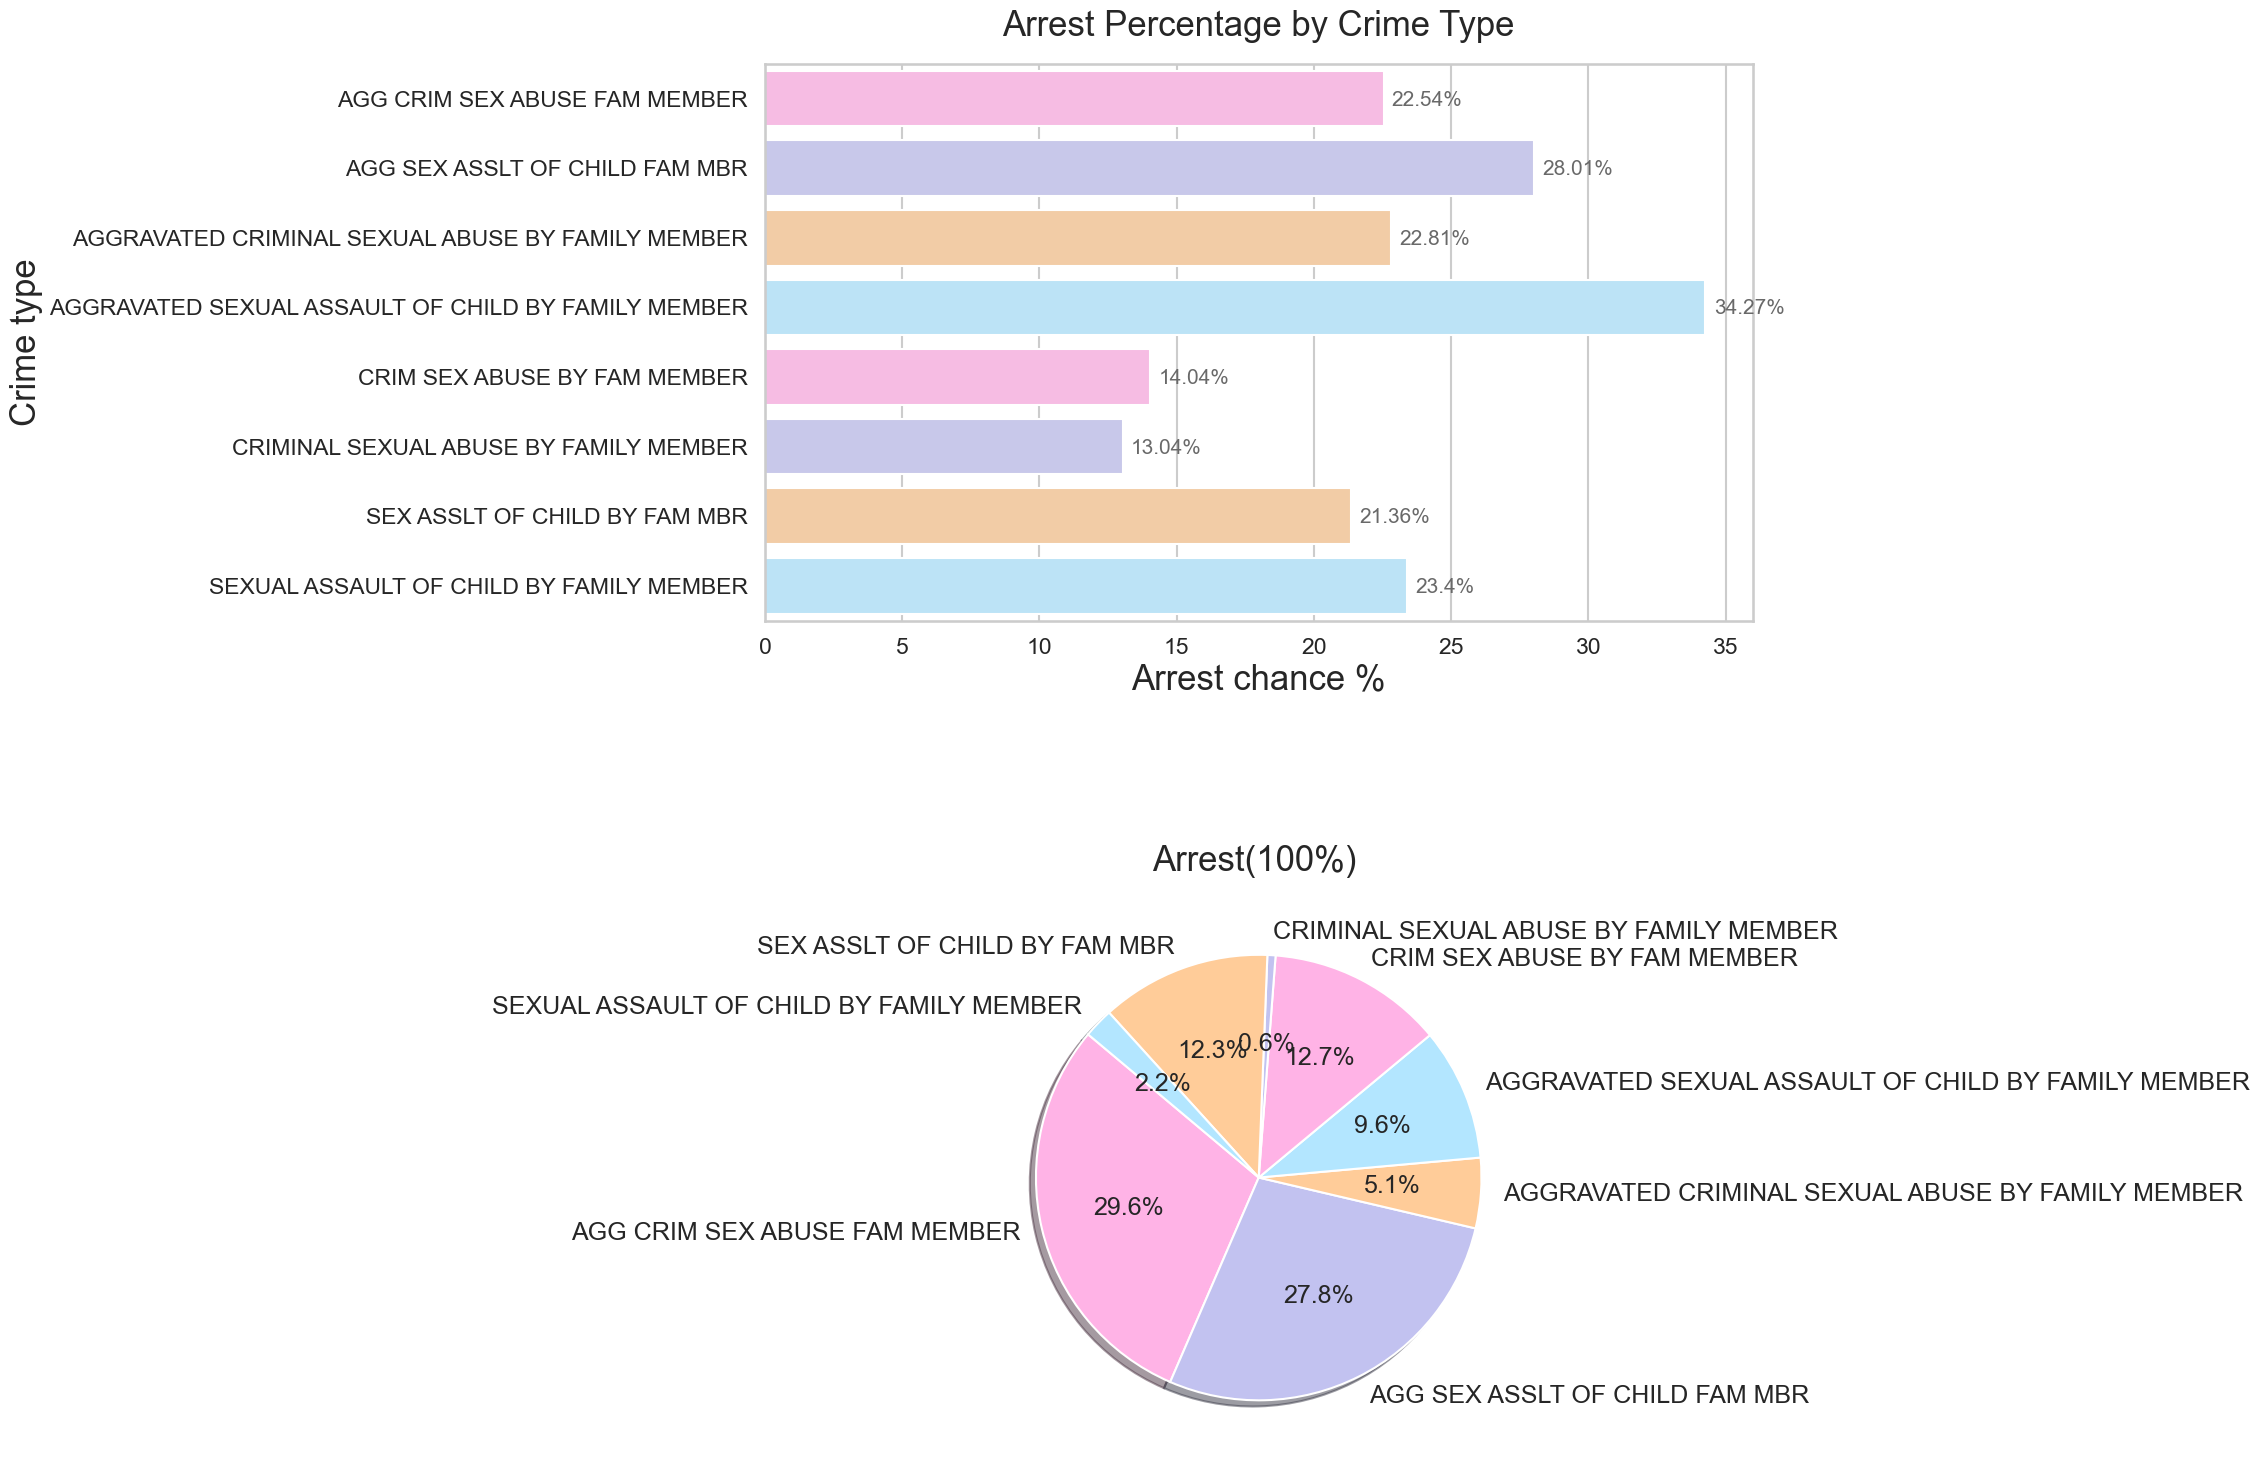

In [140]:
colors = ['#ffb3e6', '#c2c2f0','#ffcc99', '#b3e6ff']
explode = (0.1, 0) 
font_size = 16  
title_font_size = 25
fig, ax = plt.subplots(2, 1, figsize=(20, 15))  

sns.barplot(x='Arrest Percentage %', y='Description', data=summary_df, palette=colors, ax=ax[0])
ax[0].set_title('Arrest Percentage by Crime Type', pad=20, fontsize=title_font_size)
ax[0].set_xlabel('Arrest chance %',fontsize=title_font_size)
ax[0].set_ylabel('Crime type',fontsize=title_font_size)
ax[0].xaxis.grid(True)  # Adding gridlines
ax[0].set_axisbelow(True)  # Ensures gridlines are behind the bars

for i in ax[0].patches:
    ax[0].text(i.get_width()+0.3, i.get_y()+0.5, 
            str(round((i.get_width()), 2))+'%', fontsize=15,
            color='dimgrey')


arrests_labels = summary_df['Description'].tolist()  
arrests_sizes = summary_df['Arrest(100%)'].tolist()  

ax[1].pie(arrests_sizes,
          labels=arrests_labels,
          autopct='%1.1f%%',
          startangle=140,
          shadow=True,
          colors=colors,
          textprops={'fontsize': 18})
# plt.setp(autotexts, size=13, weight="bold")

ax[1].set_title('Arrest(100%) ', pad=20, fontsize=title_font_size)


plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

---

**5.6*** What period of the day does the specific kind of (domestic) offense against children, with the most recorded arrests, tend do occur? 

How does it look for all weekdays individually?
        Can you find certain periods of the week that are especially bad? 

In [141]:
most_recorde_arrests_children = summary_df.head(1).values[0][0]
most_recorded_arrests_description_children_df = child_arrests_crime_08_12_df[child_arrests_crime_08_12_df["Description"] == most_recorde_arrests_children]

In [142]:
child_arrests_crime_hours_08_12_serie= pd.DataFrame(pd.to_datetime(most_recorded_arrests_description_children_df["Date"], format='%m/%d/%Y %I:%M:%S %p'))
child_arrests_crime_hours_08_12_serie = child_arrests_crime_hours_08_12_serie["Date"].dt.strftime('%I %p').value_counts()

In [143]:
child_arrests_crime_days_08_12_serie = pd.DatetimeIndex(most_recorded_arrests_description_children_df["Date"]).day_name().value_counts()
child_arrests_crime_days_08_12_df = pd.DataFrame(child_arrests_crime_days_08_12_serie).reset_index()

In [144]:
child_arrests_crime_days_08_12_df.head(1).values[0][1]

32

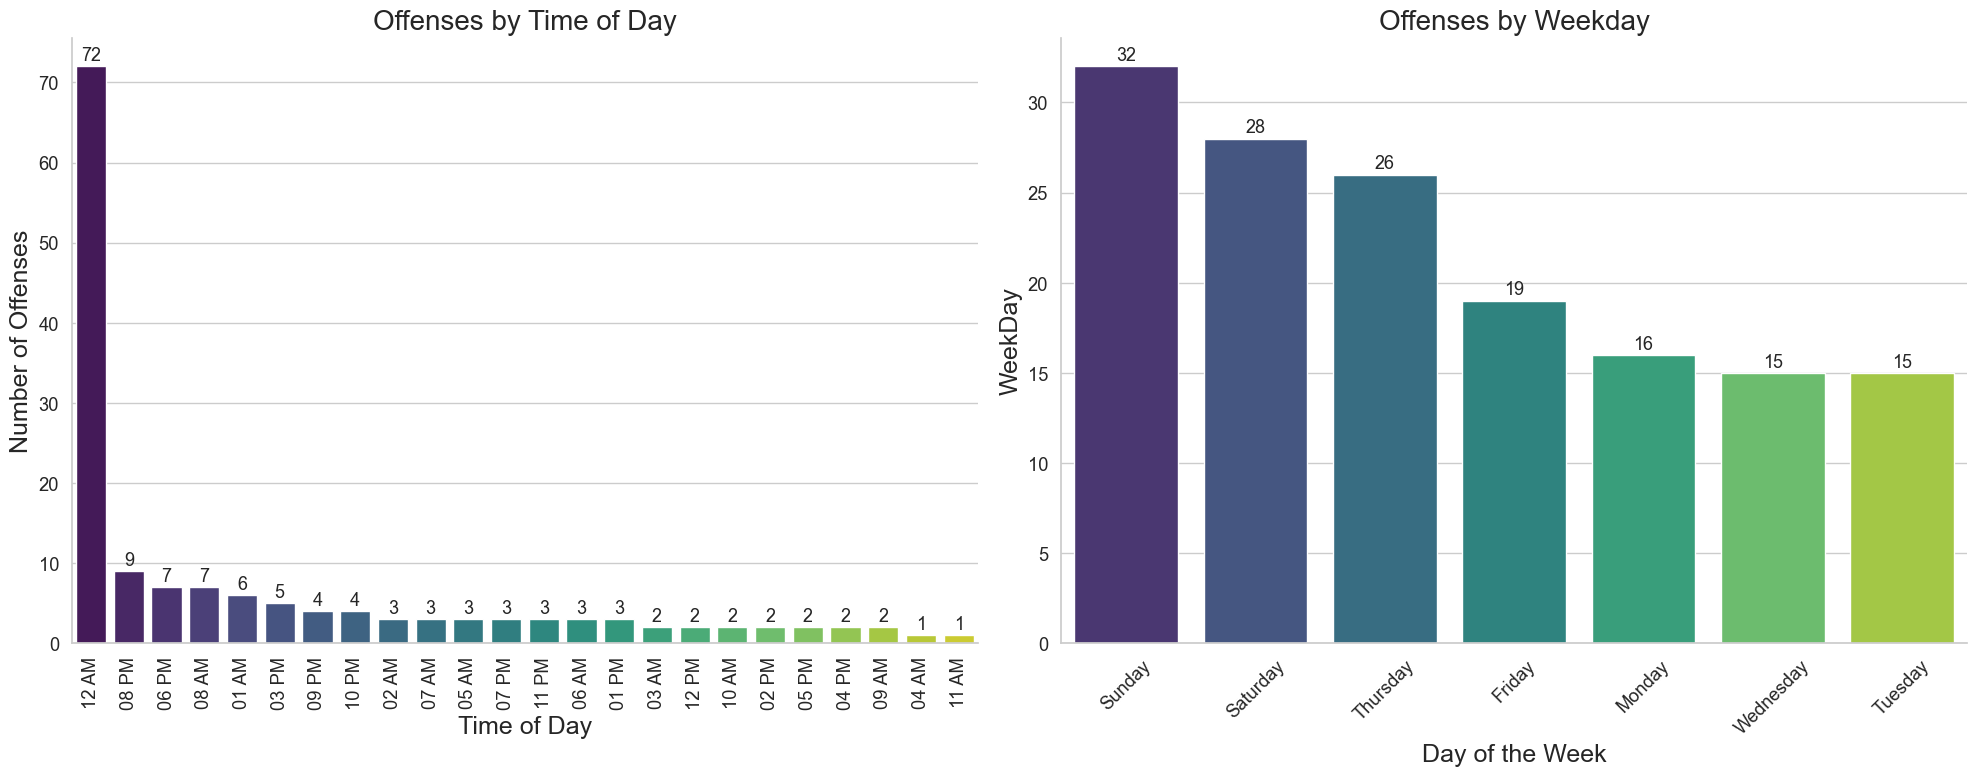

Worst period of the day would be at midnight 12 AM with 72 offenses. 
Sunday is the worst day with 32 offenses, by the barplot the weekends is the worst.


In [145]:

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)
color_palette = "viridis"
font_size = 18
font_size_title = 20
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(x=child_arrests_crime_hours_08_12_serie.index, y=child_arrests_crime_hours_08_12_serie.values, ax=ax[0], palette=color_palette)
ax[0].set_title('Offenses by Time of Day',fontsize=font_size_title)
ax[0].set_xlabel('Time of Day',fontsize=font_size)
ax[0].set_ylabel('Number of Offenses',fontsize=font_size)
ax[0].tick_params(axis='x', rotation=90)  

for bar in ax[0].patches:
    ax[0].annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

sns.barplot(x='Date', y='count', data=child_arrests_crime_days_08_12_df, ax=ax[1], palette=color_palette)
ax[1].set_title('Offenses by Weekday',fontsize=font_size_title)
ax[1].set_xlabel('Day of the Week',fontsize=font_size)
ax[1].set_ylabel('WeekDay',fontsize=font_size)
ax[1].tick_params(axis='x', rotation=45)

for bar in ax[1].patches:
    ax[1].annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

plt.tight_layout()
sns.despine()

plt.show()

print(f"Worst period of the day would be at midnight {child_arrests_crime_hours_08_12_serie.head(1).index[0]} with {child_arrests_crime_hours_08_12_serie.head(1).values[0]} offenses. \n{child_arrests_crime_days_08_12_df.head(1).values[0][0]} is the worst day with {child_arrests_crime_days_08_12_df.head(1).values[0][1]} offenses, by the barplot the weekends is the worst.")

---

**5.7*** Looking at any given year as a whole, what's the worst period in terms of domestic number of offenses involving children? Can you find any trends? Does the trend seem to be consistent for every other year? 

In [146]:
def look_at_years(year):
    filter_year = child_sex_crimes_08_12_df[child_sex_crimes_08_12_df["Year"] == year]
    return pd.DataFrame(pd.DatetimeIndex(filter_year["Date"]).month_name().value_counts()).reset_index().rename(columns={"count": f"Crimes_{year}"})


In [147]:
child_sex_crimes_08_df =look_at_years(2008)
child_sex_crimes_09_df =look_at_years(2009)
child_sex_crimes_10_df =look_at_years(2010)
child_sex_crimes_11_df =look_at_years(2011)
child_sex_crimes_12_df =look_at_years(2012)
total_crimes_years = pd.DataFrame(pd.DatetimeIndex(child_sex_crimes_08_12_df["Date"]).month_name().value_counts()).reset_index().rename(columns={"count": f"Total_crimes"})

In [148]:
merged_08_09 = pd.merge(child_sex_crimes_08_df,child_sex_crimes_09_df, on="Date")
merged_10_11 = pd.merge(child_sex_crimes_10_df,child_sex_crimes_11_df, on="Date")
merged_08_09_10_11 = pd.merge(merged_08_09,merged_10_11, on="Date")
merged_08_09_10_11_12 = merged_08_09_10_11.merge(child_sex_crimes_12_df, on="Date")
domestic_years=  merged_08_09_10_11_12.merge(total_crimes_years, on="Date").sort_values(by="Total_crimes",ascending=False).set_index("Date").reset_index()

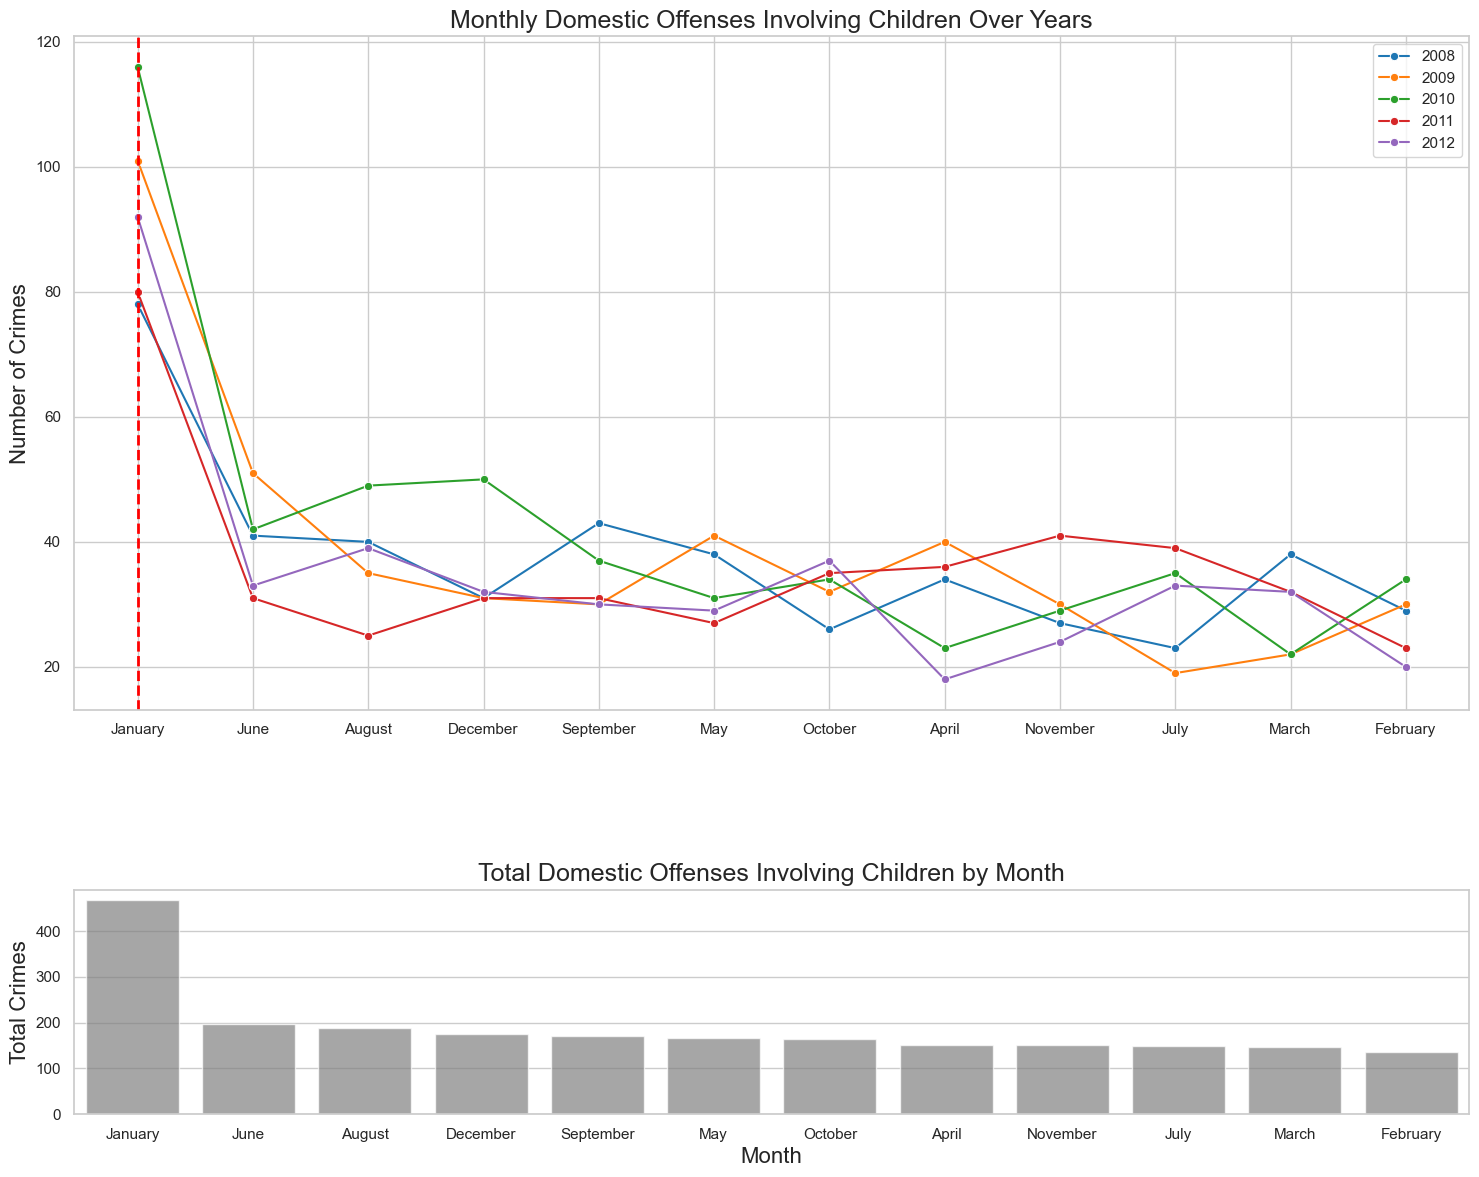

January have the highest total crime of 467 which is 2x other months under it as minimum.
February has the least domestic offenses with 136
Summer will have the a lot of offenses occuring in top 3 after januari


In [149]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(2, 1, figsize=(18, 14), gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.4})

palette = sns.color_palette("tab10", n_colors=5)
for i, column in enumerate(domestic_years.columns[1:-1], start=0):  # Skip the 'Date' and 'Total_crimes' columns
    sns.lineplot(x='Date', y=column, data=domestic_years, ax=axes[0], marker='o', label=column.split('_')[1], color=palette[i])

axes[0].set_title('Monthly Domestic Offenses Involving Children Over Years', fontsize=18)
axes[0].set_ylabel('Number of Crimes', fontsize=16)
axes[0].set_xlabel('')

max_total_crimes_month = domestic_years.loc[domestic_years['Total_crimes'].idxmax(), 'Date']
axes[0].axvline(max_total_crimes_month, color='red', linestyle='--', lw=2)
axes[0].annotate(f'Highest\n{max_total_crimes_month}', xy=(max_total_crimes_month, domestic_years['Total_crimes'].max()), 
                 xytext=(0, 30), textcoords='offset points', ha='center', color='red')

sns.barplot(x='Date', y='Total_crimes', data=domestic_years, ax=axes[1], color='gray', alpha=0.7)
axes[1].set_title('Total Domestic Offenses Involving Children by Month', fontsize=18)
axes[1].set_ylabel('Total Crimes', fontsize=16)
axes[1].set_xlabel('Month', fontsize=16)

plt.tight_layout()

plt.show()
print(f"{domestic_years.head(1).values[0][0]} have the highest total crime of {domestic_years.head(1).values[0][-1]} which is 2x other months under it as minimum.\n{domestic_years.tail(1).values[0][0]} has the least domestic offenses with {domestic_years.tail(1).values[0][-1]}\nSummer will have the a lot of offenses occuring in top 3 after januari")

---

# 6 - Bad Boys Bad Boys whatcha gonna do

**6.1** In general, what weekday is a crime most likely to occur? Which day is the safest?

In [150]:
general_weekday_crime_08_12_serie= pd.DatetimeIndex(chicago_crime_2008_to_2012_df["Date"]).day_name().value_counts()

In [151]:
general_weekday_crime_08_12_df =  pd.DataFrame(general_weekday_crime_08_12_serie).reset_index()

In [152]:
general_weekday_crime_08_12_df.tail(1).values[0][0]

'Sunday'

Friday does crime mos likely occur at, the weekend starts here so maybe many people are out partying,vandalizing or
in influence of drugs.
Sunday is the safest could be beacuse of churchday
and that new week starts people have things to do on Monday(is the safest day after sunday)


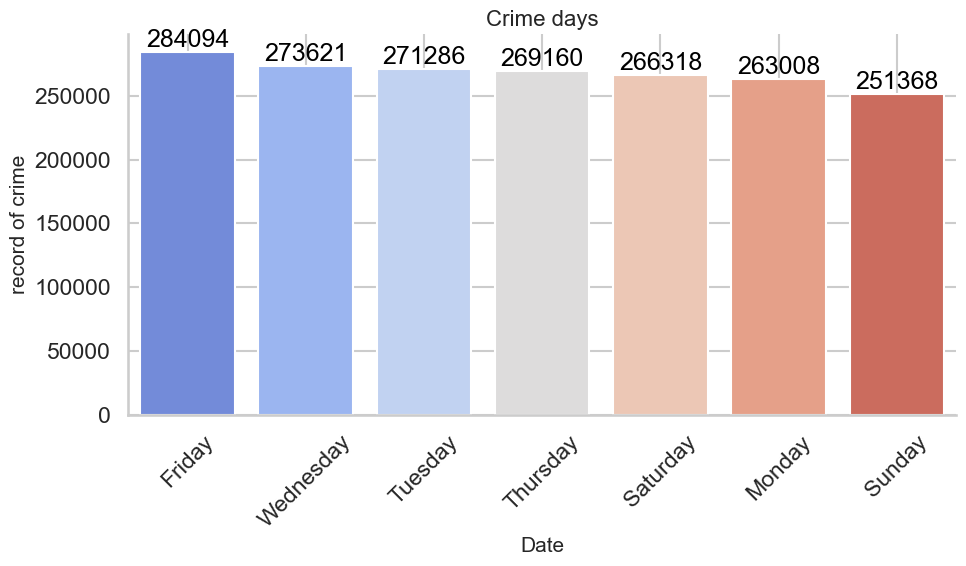

In [153]:
print(f"{general_weekday_crime_08_12_df.head(1).values[0][0]} does crime mos likely occur at, the weekend starts here so maybe many people are out partying,vandalizing or\nin influence of drugs.\n{general_weekday_crime_08_12_df.tail(1).values[0][0]} is the safest could be beacuse of churchday\nand that new week starts people have things to do on {general_weekday_crime_08_12_df.tail(2).values[0][0]}(is the safest day after sunday)")
barplot_df(general_weekday_crime_08_12_df,"Date","count","Crime days","Date","record of crime","count")

---

**6.2** Which is the most unsafe weekday for you if you'd like to avoid the following:

a) getting your phone stolen by sneaky pickpockets (THEFT) 

b) having your handbag forcibly pulled away (ROBBERY) 

c) getting jumped in an alley (ASSAULT)

For each of the above crimes, also answer at what locations you should be extra careful around.

A)


In [154]:
chicago_crime_theft_pickpocket_2008_to_2012_df = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Primary Type"] == "THEFT"]
chicago_crime_theft_pickpocket_unsafe_2008_to_2012= pd.DatetimeIndex(chicago_crime_theft_pickpocket_2008_to_2012_df["Date"]).day_name().value_counts()

unsafe_theft_day = chicago_crime_theft_pickpocket_unsafe_2008_to_2012.head(1).index[0]
unsafe_theft_day_count = chicago_crime_theft_pickpocket_unsafe_2008_to_2012.head(1).values[0]

In [155]:
chicago_crime_theft_places_pickpocket_2008_to_2012_df=chicago_crime_theft_pickpocket_2008_to_2012_df["Location Description"].value_counts().head(5).index.to_list()

In [156]:
chicago_crime_theft_pickpocket_unsafe_2008_to_2012 
# Plot
print(f"{unsafe_theft_day} happends most THEFT in pickppockets try to be carful around {chicago_crime_theft_places_pickpocket_2008_to_2012_df}")

Friday happends most THEFT in pickppockets try to be carful around ['STREET', 'RESIDENCE', 'OTHER', 'APARTMENT', 'PARKING LOT/GARAGE(NON.RESID.)']


---

B)

In [157]:
chicago_crime_robbery_2008_to_2012_df = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Primary Type"] == "ROBBERY"]
chicago_crime_robbery_unsafe_places_2008_to_2012_df = chicago_crime_robbery_2008_to_2012_df["Location Description"].value_counts().head().index.to_list()
chicago_crime_robbery_unsafe_2008_to_2012= pd.DatetimeIndex(chicago_crime_robbery_2008_to_2012_df["Date"]).day_name().value_counts()
print(f"Try to avoid {chicago_crime_robbery_unsafe_2008_to_2012.index[0]} on these places {chicago_crime_robbery_unsafe_places_2008_to_2012_df}")

Try to avoid Friday on these places ['SIDEWALK', 'STREET', 'ALLEY', 'PARKING LOT/GARAGE(NON.RESID.)', 'SMALL RETAIL STORE']


---


C)

In [158]:
chicago_crime_assault_2008_to_2012_df = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Primary Type"] == "ASSAULT"]
chicago_crime_assault_places_2008_to_2012_df= chicago_crime_assault_2008_to_2012_df["Location Description"].value_counts().head().index.to_list()
chicago_crime_assault_unsafe_2008_to_2012_df= pd.DatetimeIndex(chicago_crime_assault_2008_to_2012_df["Date"]).day_name().value_counts()

unsafe_assault_day = chicago_crime_assault_unsafe_2008_to_2012_df.head(1).index[0]


In [160]:
print(f"Avoid {unsafe_assault_day} in places like {chicago_crime_assault_places_2008_to_2012_df}  ")

Avoid Wednesday in places like ['STREET', 'SIDEWALK', 'RESIDENCE', 'APARTMENT', 'SCHOOL, PUBLIC, BUILDING']  


---

**6.3** Which are the worst 10 dates (most recorded crimes) of 2008? Does this trend hold for the other years?

In [161]:
def ten_worst_dates(year):
    filter_year = child_sex_crimes_08_12_df[child_sex_crimes_08_12_df["Year"] == year]
    return pd.DataFrame(filter_year["Date"].dt.strftime('%m-%d').value_counts().head(10)).reset_index()

In [162]:
ten_worst_date_2008_df = ten_worst_dates(2008)
ten_worst_date_2009_df = ten_worst_dates(2009)
ten_worst_date_2010_df = ten_worst_dates(2010)
ten_worst_date_2011_df = ten_worst_dates(2011)
ten_worst_date_2012_df = ten_worst_dates(2012)

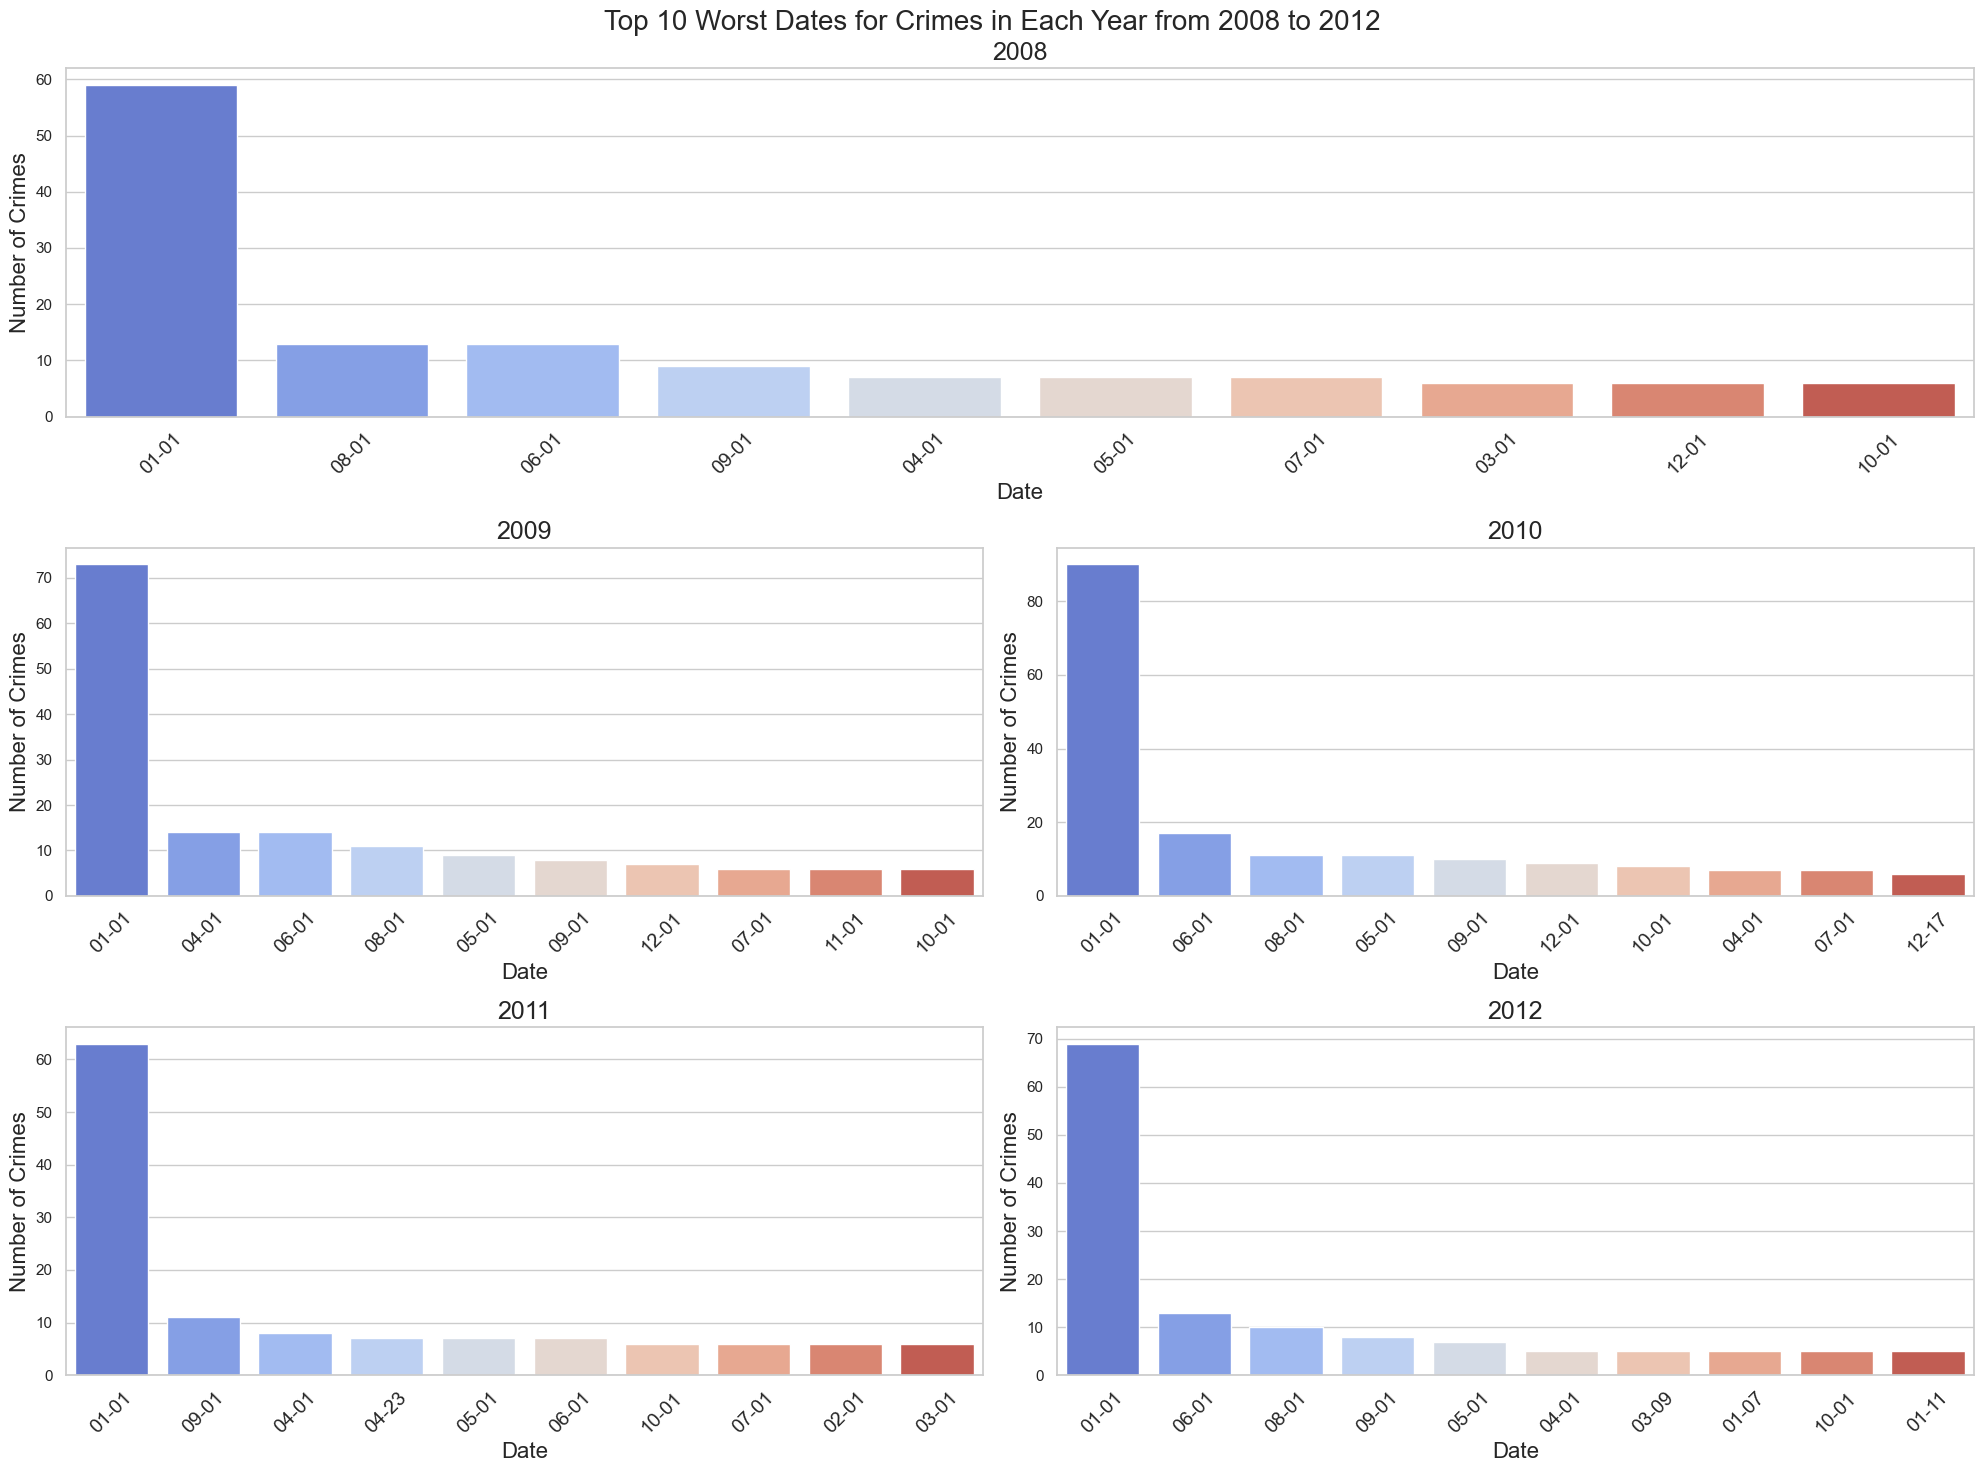

The trend of Date 01-01 is first in every year, Because it is the new year so people go crazy.
Some dates are in each year but not same order.
Due to new dates being added in top 10 plot is in barplot for best comparison and clarity.


In [163]:

sns.set_theme(style="whitegrid")

fig = plt.figure(figsize=(20, 15))

axes = [plt.subplot2grid((3, 2), (0, 0),colspan=2), plt.subplot2grid((3, 2), (1, 0)),
        plt.subplot2grid((3, 2), (1, 1)), plt.subplot2grid((3, 2), (2, 0)),
        plt.subplot2grid((3, 2), (2, 1))]

fig.suptitle('Top 10 Worst Dates for Crimes in Each Year from 2008 to 2012', fontsize=20)

years_dfs = [ten_worst_date_2008_df, ten_worst_date_2009_df, ten_worst_date_2010_df,
             ten_worst_date_2011_df, ten_worst_date_2012_df]
years = [2008, 2009, 2010, 2011, 2012]

for ax, df, year in zip(axes, years_dfs, years):
    sns.barplot(x='Date', y='count', data=df, ax=ax, palette='coolwarm') 
    ax.set_title(f'{year}', fontsize=18)
    ax.set_xlabel('Date', fontsize=16)
    ax.set_ylabel('Number of Crimes', fontsize=16)
    ax.tick_params(axis='x', rotation=45,labelsize=14)
  
plt.tight_layout()  

plt.show()
print(f"The trend of Date {ten_worst_date_2008_df.head(1).values[0][0]} is first in every year, Because it is the new year so people go crazy.\nSome dates are in each year but not same order.\nDue to new dates being added in top 10 plot is in barplot for best comparison and clarity.")

---

**6.4** From the perspective of total number of crime records, which are the Top 10 primary crime types? Which are the Bottom 10? 

Consider this question for the years 2008-2012 as a whole. 

In [164]:
ranked_crimes_recorded_08_to_12 = chicago_crime_2008_to_2012_df["Primary Type"].value_counts()
ranked_crimes_top_10_recorded_08_to_12= pd.DataFrame(ranked_crimes_recorded_08_to_12.head(10)).reset_index()
ranked_crimes_bottom_10_recorded_08_to_12= pd.DataFrame(ranked_crimes_recorded_08_to_12.tail(10)).reset_index()


In [165]:
top_10_df = ranked_crimes_top_10_recorded_08_to_12
bottom_10_df = ranked_crimes_bottom_10_recorded_08_to_12

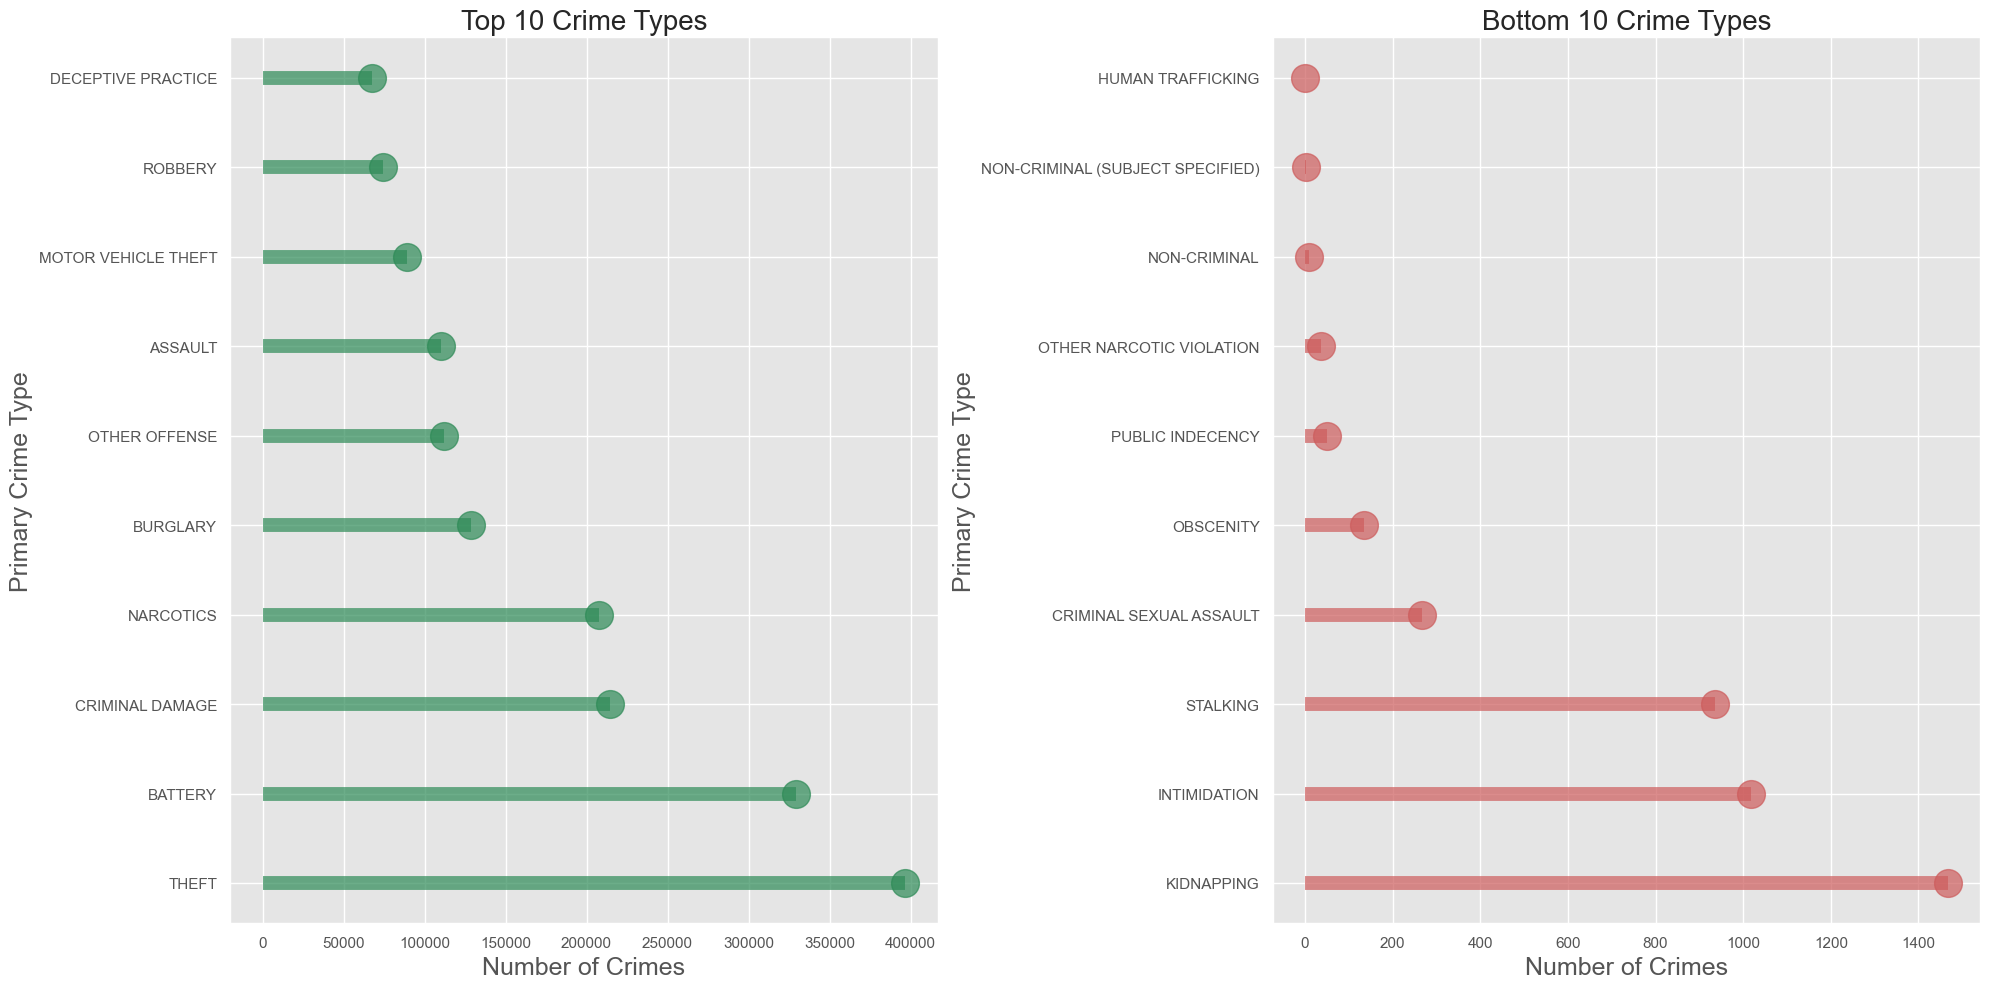

In [166]:
plt.style.use('ggplot')

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

top_color = 'seagreen'
bottom_color = 'indianred'

ax[0].hlines(y=top_10_df['Primary Type'], xmin=0, xmax=top_10_df['count'], color=top_color, alpha=0.7, linewidth=10)
ax[0].plot(top_10_df['count'], top_10_df['Primary Type'], "o", markersize=20, color=top_color, alpha=0.7)

ax[1].hlines(y=bottom_10_df['Primary Type'], xmin=0, xmax=bottom_10_df['count'], color=bottom_color, alpha=0.7, linewidth=10)
ax[1].plot(bottom_10_df['count'], bottom_10_df['Primary Type'], "o", markersize=20, color=bottom_color, alpha=0.7)


ax[0].set_title('Top 10 Crime Types', fontdict={'fontsize': 20})
ax[1].set_title('Bottom 10 Crime Types', fontdict={'fontsize': 20})
for axis in ax:
    axis.set_xlabel('Number of Crimes', fontdict={'fontsize': 18})
    axis.set_ylabel('Primary Crime Type', fontdict={'fontsize': 18})

fig.tight_layout()


plt.show()


---

**6.5** For all those crime categories you identified in 6.4, how does their distribution instead look per year - rather than the full 2008-2012 period as a whole?

In [167]:
def merge_five_df(df1,df2,df3,df4,df5):
    merge_2 = pd.merge(df1,df2, on="Primary Type", how="outer")
    merge_3 = merge_2.merge(df3, on="Primary Type", how="outer")
    merge_4 = merge_3.merge(df4, on="Primary Type", how="outer")
    merge_5 = merge_4.merge(df5, on="Primary Type",how="outer")
    
    return merge_5

In [168]:
def top_ten_crimes(year,crimes):
    filtered_df = chicago_crime_2008_to_2012_df[(chicago_crime_2008_to_2012_df["Year"] == year) & (chicago_crime_2008_to_2012_df["Primary Type"].isin(crimes))]
    return pd.DataFrame(filtered_df["Primary Type"].value_counts()).reset_index().rename(columns={"count": f"crimes_{year}"})

In [169]:
top_crimes_10=ranked_crimes_top_10_recorded_08_to_12["Primary Type"].to_list()
bottom_crimes_10 = ranked_crimes_bottom_10_recorded_08_to_12["Primary Type"].to_list()
all_years_top_10= merge_five_df(top_ten_crimes(2008,top_crimes_10),top_ten_crimes(2009,top_crimes_10),top_ten_crimes(2010,top_crimes_10),top_ten_crimes(2011,top_crimes_10),top_ten_crimes(2012,top_crimes_10))
all_years_bottom_10= merge_five_df(top_ten_crimes(2008,bottom_crimes_10),top_ten_crimes(2009,bottom_crimes_10),top_ten_crimes(2010,bottom_crimes_10),top_ten_crimes(2011,bottom_crimes_10),top_ten_crimes(2012,bottom_crimes_10))

In [170]:
all_years_bottom_10=all_years_bottom_10.fillna(0).astype({   'crimes_2008': 'int', 
    'crimes_2009': 'int', 
    'crimes_2010': 'int', 
    'crimes_2011': 'int', 
    'crimes_2012': 'int'})
all_years_bottom_10["Total_Crimes"] = all_years_bottom_10.iloc[:, 1:].sum(axis=1).astype(int)
all_years_top_10=all_years_top_10.fillna(0).astype({   'crimes_2008': 'int', 
    'crimes_2009': 'int', 
    'crimes_2010': 'int', 
    'crimes_2011': 'int', 
    'crimes_2012': 'int'})
all_years_top_10["Total_Crimes"] = all_years_top_10.iloc[:, 1:].sum(axis=1).astype(int)

In [171]:
all_years_bottom_10.set_index('Primary Type', inplace=True)
all_years_top_10.set_index('Primary Type', inplace=True)

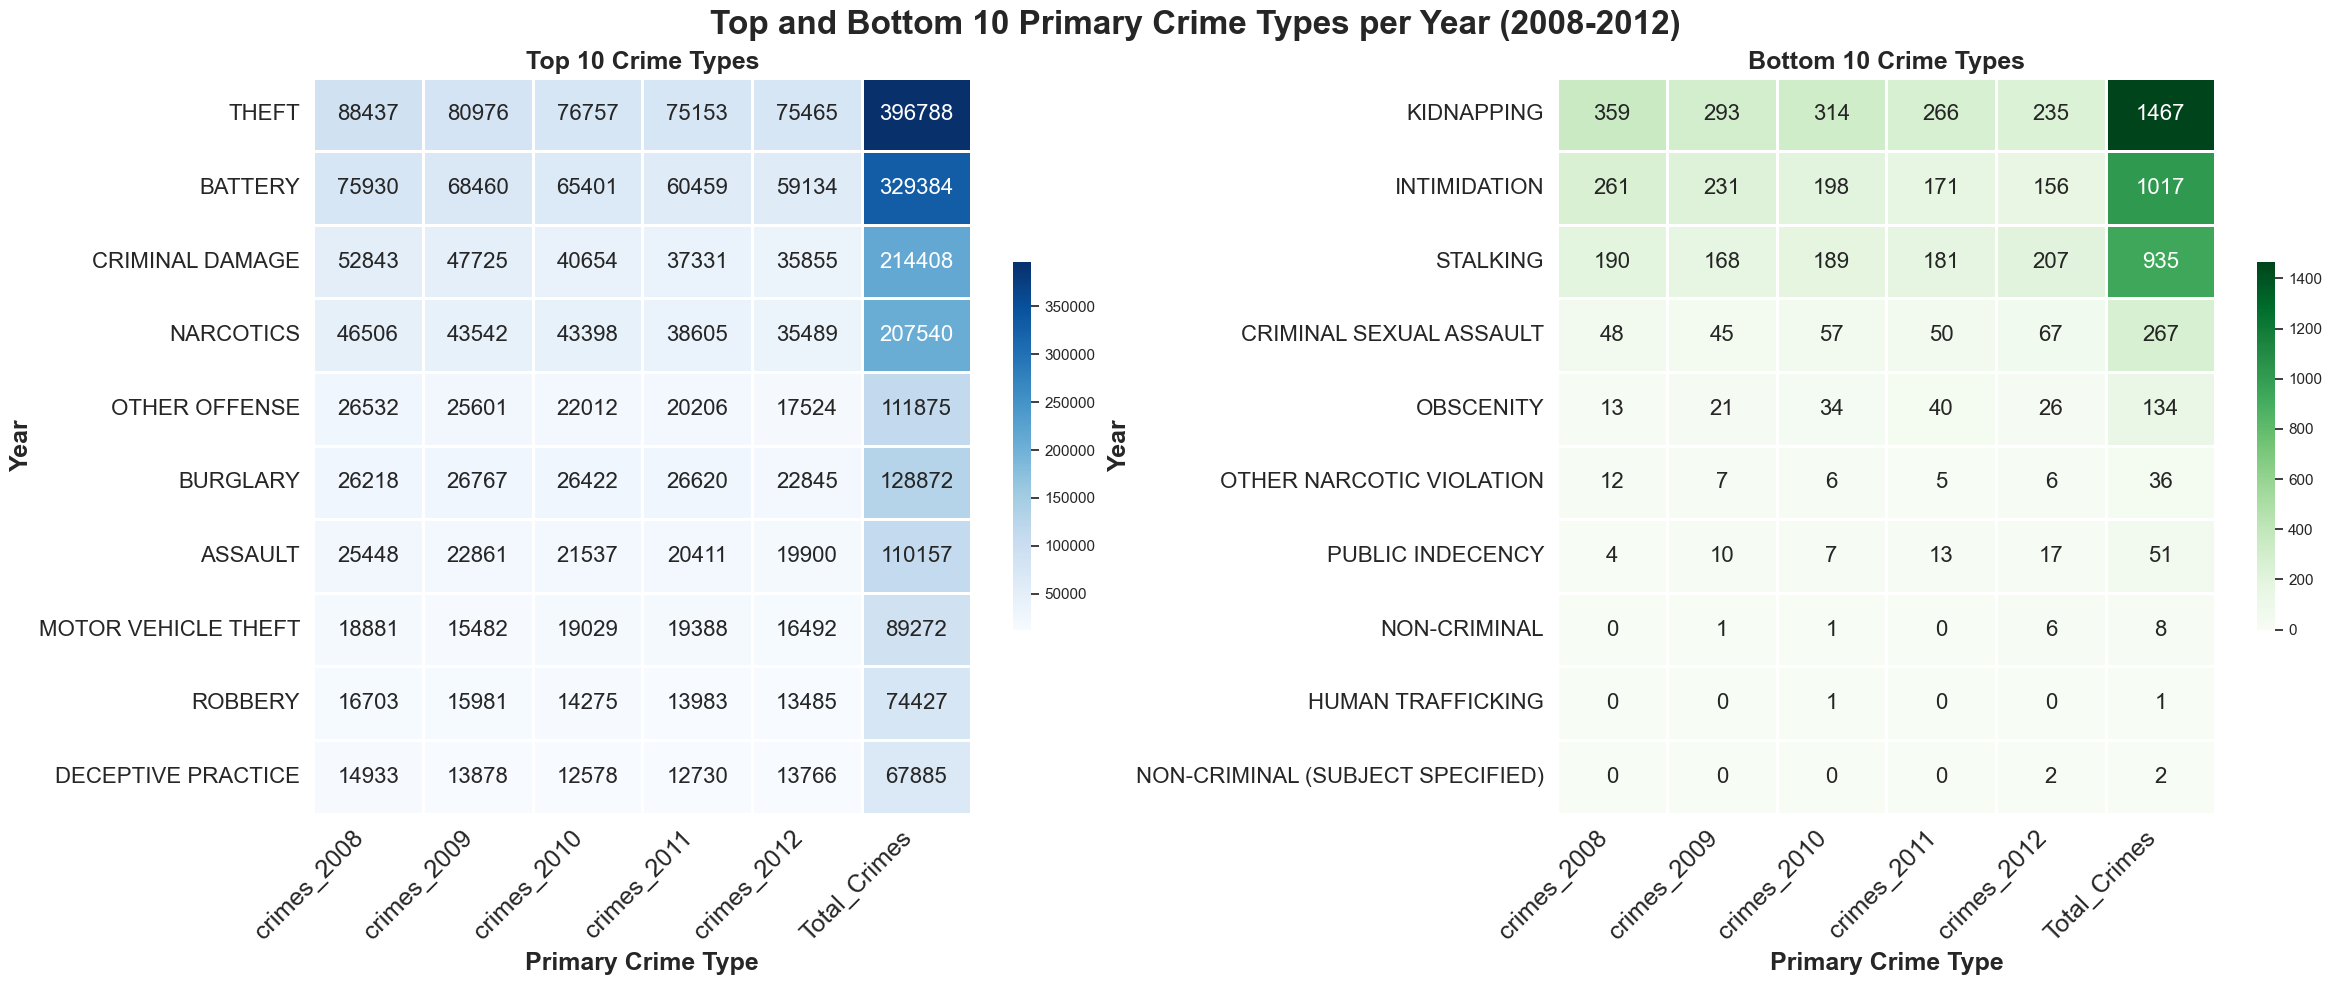

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(24, 10), sharey=False)

fig.suptitle('Top and Bottom 10 Primary Crime Types per Year (2008-2012)', fontsize=24, weight='bold')

def format_heatmap(ax, data, title, cmap):
    sns.heatmap(data, ax=ax, cmap=cmap, annot=True, fmt='d', annot_kws={'size': 16},
                linewidths=.8, cbar_kws={'shrink': 0.5})
    ax.set_title(title, fontsize=18, weight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
    ax.set_xlabel('Primary Crime Type', fontsize=18, weight='bold')
    ax.set_ylabel('Year', fontsize=18, weight='bold')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)  

format_heatmap(axes[0], all_years_top_10, 'Top 10 Crime Types', 'Blues')

format_heatmap(axes[1], all_years_bottom_10, 'Bottom 10 Crime Types', 'Greens')

plt.tight_layout() 

plt.show()


---

**6.6*** Which primary crime types does the city of Chicago seem to get better at preventing? For which ones is it the opposite, i.e, the situation is getting worse? 

In [173]:
ordered_primary_type_difference_df= highest_percent_merged_08_and_12.sort_values(by="Difference 2008-2012",ascending=False)

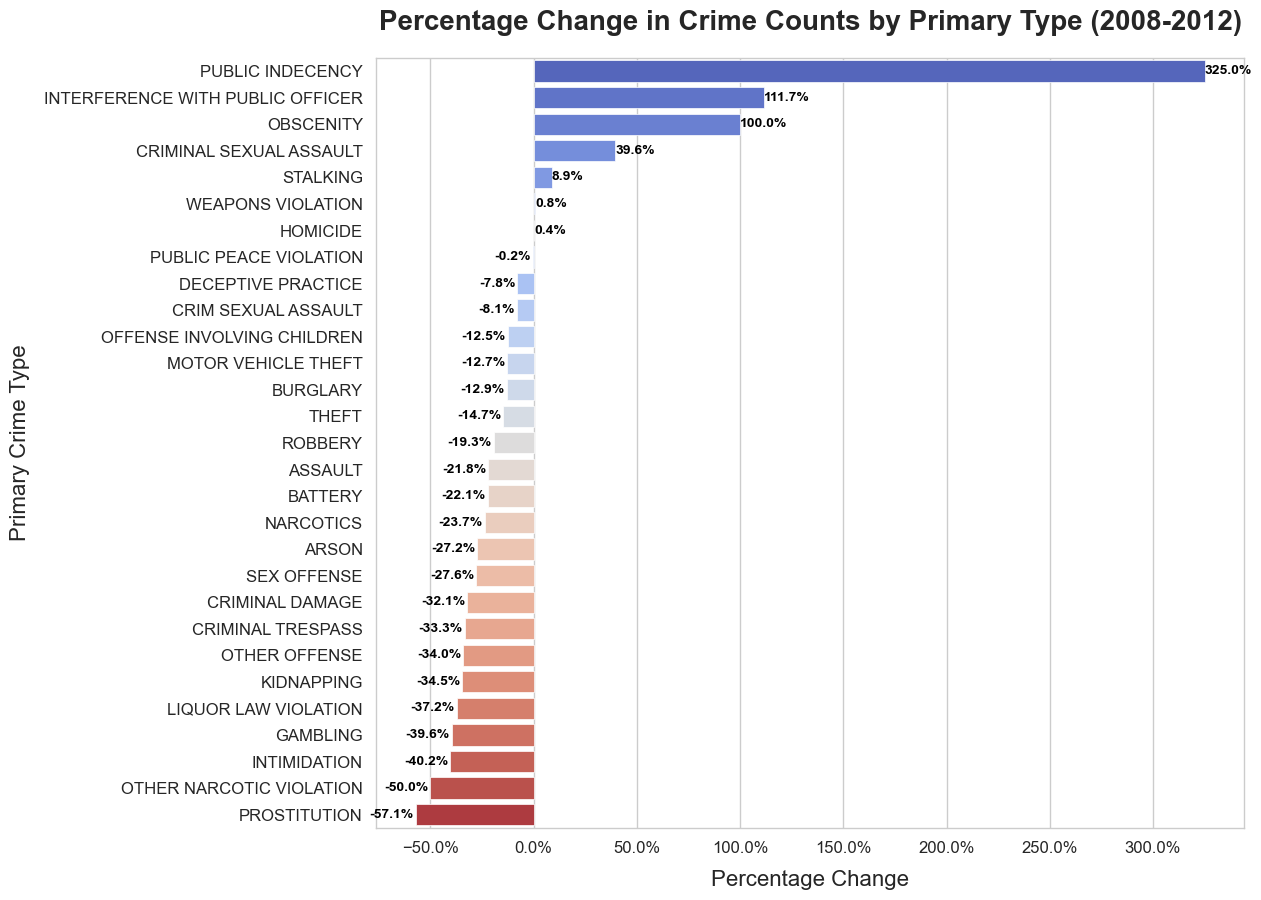

PUBLIC INDECENCY is getting worse at preventing with 325.0% increase
PROSTITUTION is getting better at preventing with -57.13% decrease


In [174]:
sns.set_style("whitegrid")

plt.figure(figsize=(14, 10))
barplot = sns.barplot(
    x='Percentage Change', 
    y='Primary Type', 
    data=highest_percent_merged_08_and_12,
    palette='coolwarm'  
)

plt.title('Percentage Change in Crime Counts by Primary Type (2008-2012)', fontsize=20, weight='bold', pad=20)
plt.xlabel('Percentage Change', fontsize=16, labelpad=10)
plt.ylabel('Primary Crime Type', fontsize=16, labelpad=10)

barplot.xaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))

for p in barplot.patches:
    width = p.get_width()
    text_pos_x = width if width > 0 else width - 1
    plt.text(
        text_pos_x,
        p.get_y() + p.get_height() / 2,
        f'{width:.1f}%',
        va='center',
        ha='right' if width < 0 else 'left',
        color='black',
        fontsize=10,
        fontweight='bold'
    )


plt.subplots_adjust(left=0.28)  
barplot.tick_params(axis='both', which='major', labelsize=12)

plt.show()
print(f"{highest_percent_merged_08_and_12.head(1).values[0][0]} is getting worse at preventing with {highest_percent_merged_08_and_12.head(1).values[0][-1]}% increase")
print(f"{highest_percent_merged_08_and_12.tail(1).values[0][0]} is getting better at preventing with {highest_percent_merged_08_and_12.tail(1).values[0][-1]}% decrease")

In [175]:
fig = px.bar(
    ordered_primary_type_difference_df,
    y='Primary Type',
    x='Difference 2008-2012',
    orientation='h',
    title="Change in Crime Counts by Primary Type (2008-2012)",
    labels={'Difference 2008-2012': 'Difference in Crime Counts', 'Primary Type': 'Crime Type'},
    color='Difference 2008-2012',
    color_continuous_scale=px.colors.diverging.Tealrose,
    # range_x=[-max_diff, max_diff]
)

# Update layout for a cleaner look
fig.update_layout(coloraxis_showscale=False)  # Hide color scale
fig.update_yaxes(categoryorder='total ascending')

# Show the figure
fig.show()


If we look here we can see CRIMINAL DAMAGE is getting better to have decreased inc rime counts and INERFERENCE WITH PUBLIC OFFICER has increased.
So it depends on if one check the Percentage increase/decrease of the crime count in cases

---

# 7 - Night Stalker

**7.1** Are there more or less crimes reported during daytime, compared with nighttime? Daytime is considered as all hours between 06:00-18:00, nighttime is the rest of the day.

In [176]:
night_df = chicago_crime_2008_to_2012_df[
        (pd.DatetimeIndex(chicago_crime_2008_to_2012_df["Date"]).hour >= 19)
        | (pd.DatetimeIndex(chicago_crime_2008_to_2012_df["Date"]).hour <= 5)
    ]
day_df = chicago_crime_2008_to_2012_df[
        (pd.DatetimeIndex(chicago_crime_2008_to_2012_df["Date"]).hour >= 6)
        & (pd.DatetimeIndex(chicago_crime_2008_to_2012_df["Date"]).hour <= 18) 
    ]

day_crimes = day_df["Date"].value_counts().sum()
night_crimes = night_df["Date"].value_counts().sum()


Night crimes: 815,535, Day crimes: 1,063,320
Difference: 247,785 more Day crimes 


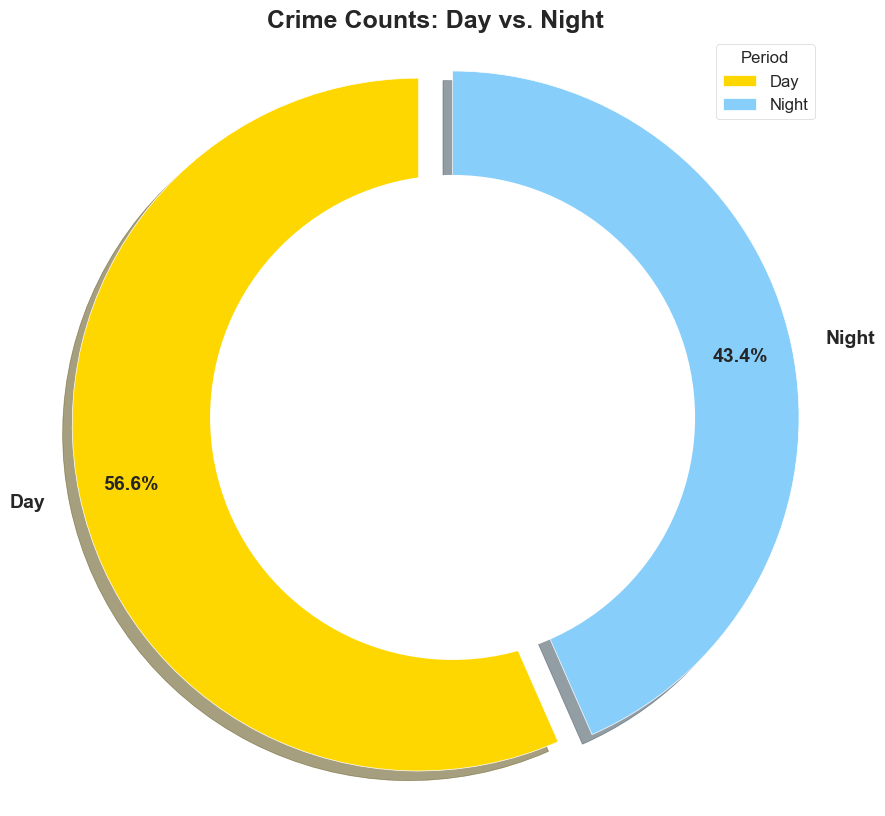

In [177]:
print(f"Night crimes: {night_crimes:,.0f}, Day crimes: {day_crimes:,.0f}")
print(f"Difference: {day_crimes-night_crimes:,.0f} more Day crimes ")
sizes =[day_df["Date"].value_counts().sum(),night_df["Date"].value_counts().sum()]
labels = ['Day', 'Night']
colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  

plt.figure(figsize=(10, 10))  
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode,
        shadow=True, pctdistance=0.85, textprops={'fontsize': 14, 'fontweight': 'bold'})

centre_circle = plt.Circle((0, 0), 0.70, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')

plt.title('Crime Counts: Day vs. Night', fontsize=18, fontweight='bold')

plt.legend(labels, title="Period", loc="best", fontsize=12)

plt.show()

---

**7.2** In general, for each weekday, how many crimes are recorded during daytime and how many during nighttime? What are the trends? Are there any weekdays that stands out somehow?

In [178]:
day_crimes_weekday_df = pd.DataFrame(pd.DatetimeIndex(day_df["Date"]).day_name().value_counts()).reset_index()
night_crimes_weekday_df = pd.DataFrame(pd.DatetimeIndex(night_df["Date"]).day_name().value_counts()).reset_index()


In [180]:
combined_df = day_crimes_weekday_df.merge(night_crimes_weekday_df, on='Date', suffixes=('_day', '_night'))

# Now let's melt this DataFrame so that it's long-form and can be used with seaborn
melted_df = pd.melt(combined_df, id_vars='Date', var_name='Period', value_name='Count')

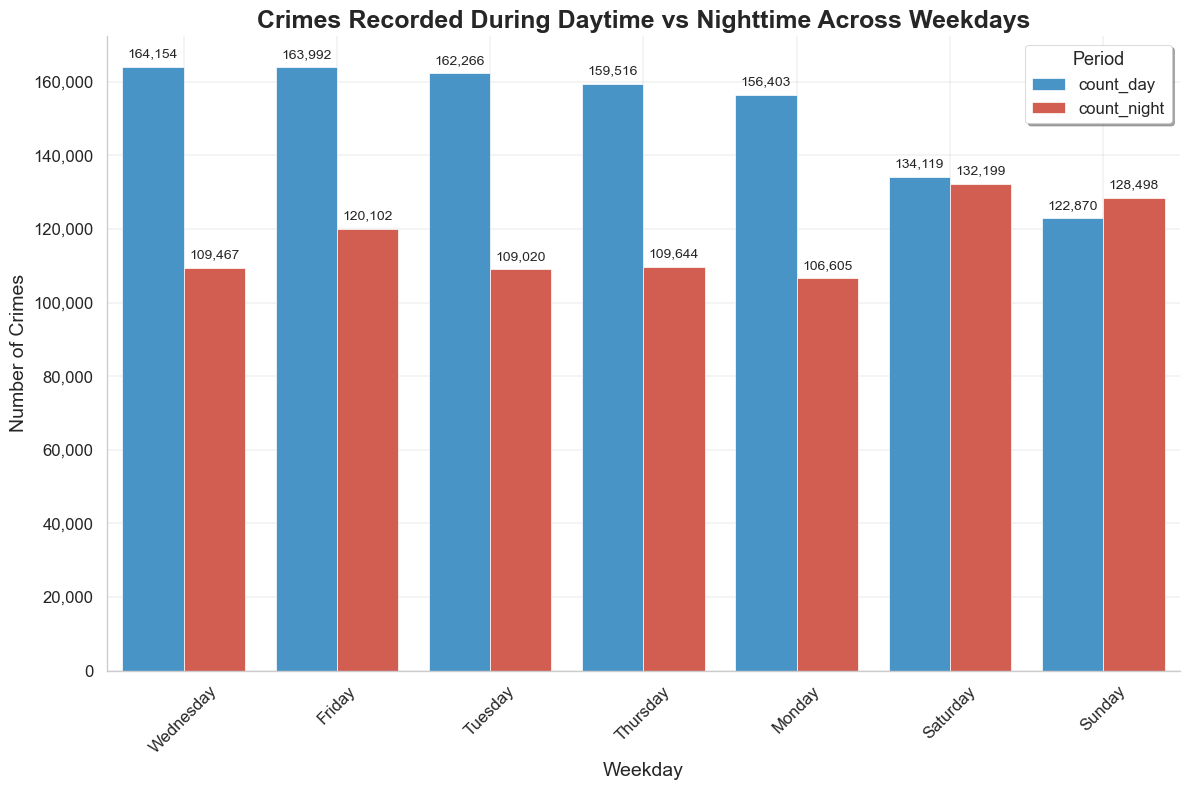

Trend is on weekends day crime goes down could be becasue people are at home & night crimes increase. Otherwise it is reverse. 


In [181]:
sns.set_style("whitegrid")

palette = ["#3498db", "#e74c3c"]  

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Date', y='Count', hue='Period', data=melted_df, palette=palette)

plt.title('Crimes Recorded During Daytime vs Nighttime Across Weekdays', fontsize=18, weight='bold')
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():,.0f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),  # 9 points vertical offset
                     textcoords = 'offset points',
                     fontsize=10)

plt.legend(title='Period', fontsize=12, title_fontsize='13', loc='upper right', frameon=True, shadow=True)

barplot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.xticks(rotation=45, fontsize=12)

plt.yticks(fontsize=12)

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

sns.despine()

plt.tight_layout()
plt.show()
print(f"Trend is on weekends day crime goes down could be becasue people are at home & night crimes increase. Otherwise it is reverse. ")

---

**7.3** Does the trends you've found in 7.3 also hold if you look at each year individually?

In [182]:
def day_and_night_crimes_year(whole_df,start_year=2008, end_year=2012):
    results = {}
    for year in range(start_year, end_year + 1):
        year_df = whole_df[whole_df["Year"] == year]
        weekdays_counts = pd.DatetimeIndex(year_df["Date"]).day_name().value_counts()
        weekdays_df = weekdays_counts.to_frame().reset_index()
        weekdays_df.columns = ["Weekday", f"Count_{year}"]
        results[year] = weekdays_df.set_index("Weekday")

    merged_df = None
    for year, df in results.items():
        if merged_df is None:
            merged_df = df
        else:
            merged_df = merged_df.merge(df, left_index=True, right_index=True, how='outer')

    return merged_df.reset_index()


In [183]:
night_weekdays_df =day_and_night_crimes_year(night_df)
day_weekdays_df =day_and_night_crimes_year(day_df)

In [184]:
night_melted_weekdays_df=pd.melt(night_weekdays_df, id_vars=['Weekday'], var_name='Year', value_name='Crime Count')
day_melted_weekdays_df=pd.melt(day_weekdays_df, id_vars=['Weekday'], var_name='Year', value_name='Crime Count')

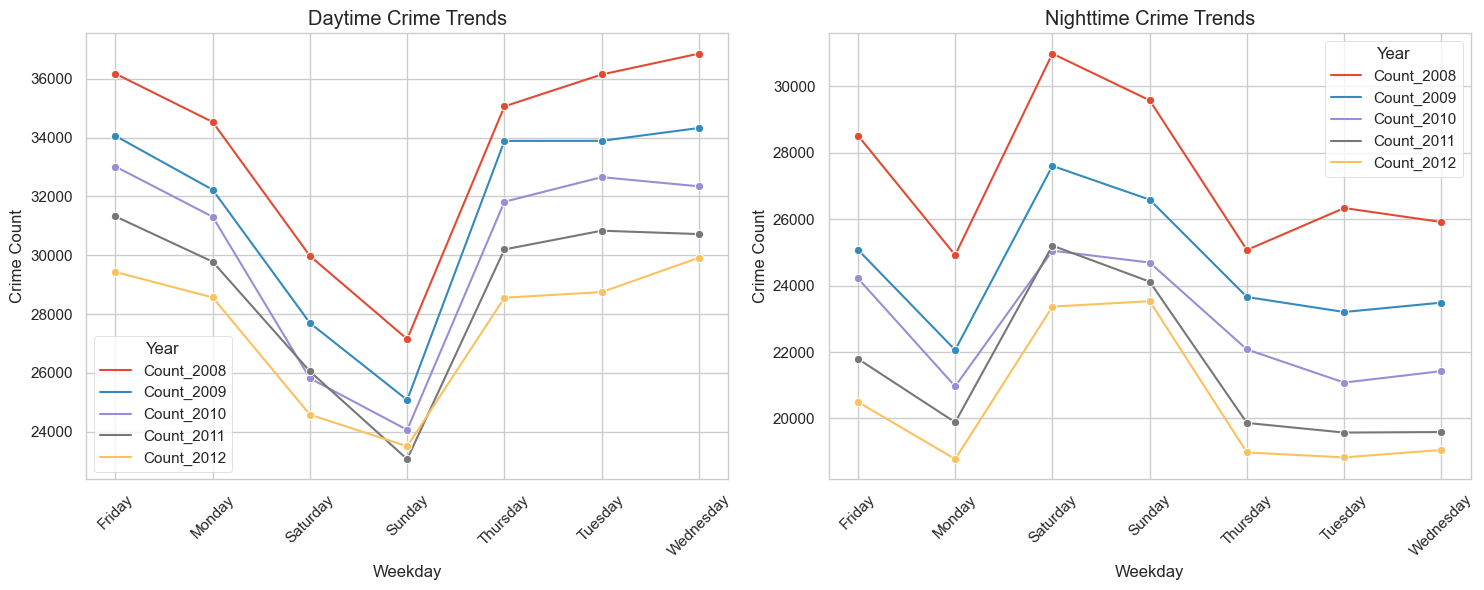

In [185]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.lineplot(data=day_melted_weekdays_df, x='Weekday', y='Crime Count', hue='Year',marker="o", ax=axes[0])
axes[0].set_title('Daytime Crime Trends')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.lineplot(data=night_melted_weekdays_df, x='Weekday', y='Crime Count', hue='Year',marker="o", ax=axes[1])
axes[1].set_title('Nighttime Crime Trends')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()

plt.show()


---

**7.4** Are there any weekdays in which Stalking occurs more often during nighttime?

In [186]:
stalking_night_df= night_df[night_df["Primary Type"] == "STALKING"]

In [187]:
stalking_night_weekday_df= pd.DataFrame(pd.DatetimeIndex(stalking_night_df["Date"]).day_name().value_counts()).reset_index()

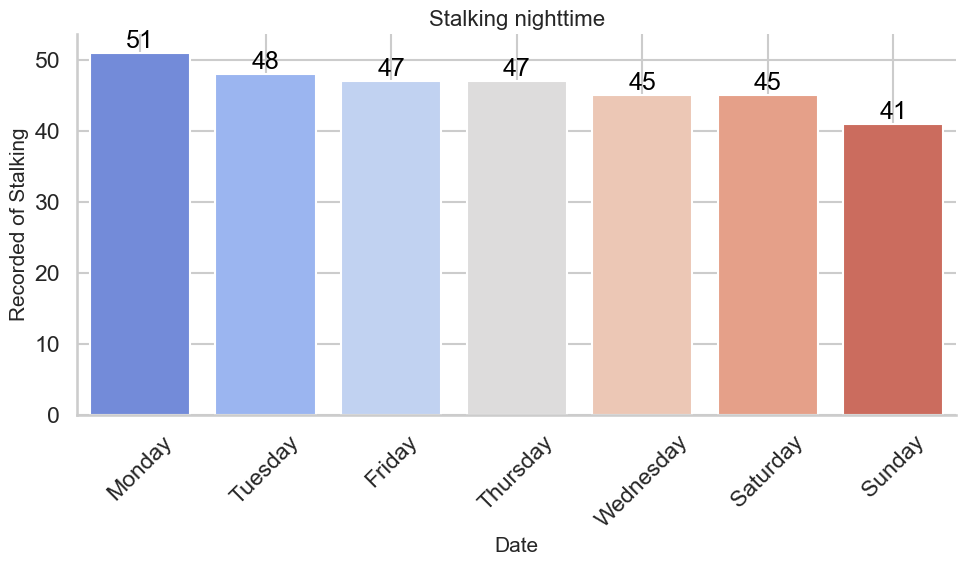

Stalking occur often in nightimes, could be easier for them that why


In [188]:
barplot_df(stalking_night_weekday_df,"Date","count","Stalking nighttime","Date","Recorded of Stalking","count")
print("Stalking occur often in nightimes, could be easier for them that why")


---

**7.5*** Are there any specific primary crime types that most often occur during nights? If so, which ones are they? Where do they occur? Are certain days of the week notable here somehow?

In [189]:
most_occuring_night_crimes = list(night_df["Primary Type"].value_counts().head(5).index) 
primary_type_night_crimes = pd.DataFrame(night_df["Primary Type"].value_counts().head(5)).reset_index()
most_occuring_night_crimes_df = night_df[night_df["Primary Type"].isin(most_occuring_night_crimes)]

In [190]:
most_occuring_night_crimes_location_df = pd.DataFrame(most_occuring_night_crimes_df["Location Description"].value_counts().head(10)).reset_index()

In [191]:
most_occuring_weekday_night_crimes_df= pd.DataFrame(pd.DatetimeIndex(most_occuring_night_crimes_df["Date"]).day_name().value_counts()).reset_index()

In [192]:

colors_crime_types = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']
colors_locations = ['#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']
colors_weekdays = ['#FFA15A', '#00CC96', '#636EFA', '#EF553B', '#AB63FA']

fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.1,
    subplot_titles=("Night Crime Types (Top 5 Primary Types)", "Locations of Night Crimes (Top 5 Primary Types)", "Night Crimes by Weekday (Top 5 Primary Types)")
)

fig.add_trace(
    go.Bar(
        x=primary_type_night_crimes['count'],
        y=primary_type_night_crimes['Primary Type'],
        orientation='h',
        marker_color=colors_crime_types,
        name='Crime Types'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=most_occuring_night_crimes_location_df['count'],
        y=most_occuring_night_crimes_location_df['Location Description'],
        orientation='h',
        marker_color=colors_locations,
        name='Locations'
    ),
    row=2, col=1
)

fig.add_trace(
    go.Bar(
        x=most_occuring_weekday_night_crimes_df['count'],
        y=most_occuring_weekday_night_crimes_df['Date'],
        orientation='h',
        marker_color=colors_weekdays,
        name='Weekdays'
    ),
    row=3, col=1
)

fig.update_layout(
    height=1200, 
    title_text="Comprehensive Night Crimes Analysis",
    showlegend=False,
    title_x=0.5,
    title_font_size=22
)

fig.update_yaxes(title_text="Crime Type", row=1, col=1)
fig.update_yaxes(title_text="Location", row=2, col=1)
fig.update_yaxes(title_text="Weekday", row=3, col=1)

fig.update_xaxes(title_text="Number of Crimes", row=3, col=1)

fig.update_layout(
    margin=dict(l=20, r=20, t=100, b=20),  
    paper_bgcolor="white",
    plot_bgcolor="white", 
)

fig.update_traces(
    hoverinfo="y+x", 
    hoverlabel=dict(bgcolor="white", font_size=14, font_family="Rockwell") 
)
fig.show()


---

# 8 - Grand Theft Auto

**8.1** You just bought a new car. What weekday should you be most wary of as it has the highest risk for a Grand Theft Auto-style robbery (MOTOR VEHICLE THEFT)?

In [193]:
gta_crimes_08_12_df = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Primary Type"] == "MOTOR VEHICLE THEFT"]

In [194]:
gta_crimes_worst_days_08_12_df = pd.DataFrame(pd.DatetimeIndex(gta_crimes_08_12_df["Date"]).day_name().value_counts()).reset_index()

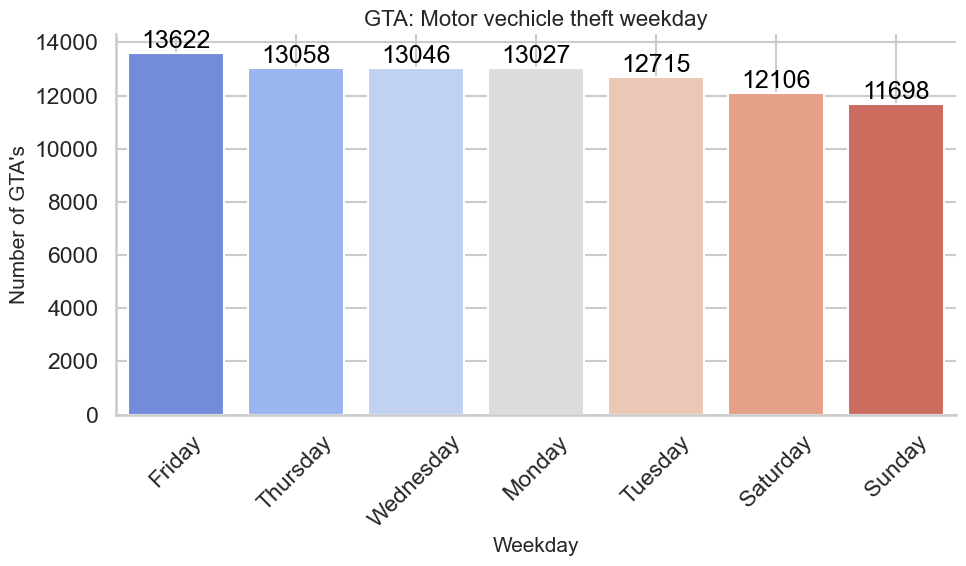

Friday is the worst day 


In [195]:

barplot_df(gta_crimes_worst_days_08_12_df,"Date","count","GTA: Motor vechicle theft weekday","Weekday","Number of GTA's","count")
print(f"{gta_crimes_worst_days_08_12_df.values[0][0]} is the worst day ")

---

**8.2** For that day, where (at what location) should you absolutely avoid leave your car carelessly? Where is it seemingly safest to do so?

In [212]:
gta_crimes_friday_08_12_df = gta_crimes_08_12_df[pd.DatetimeIndex(gta_crimes_08_12_df["Date"]).day_name() ==gta_crimes_worst_days_08_12_df.head(1).Date.values[0]]

In [214]:
location_GTA= gta_crimes_friday_08_12_df["Location Description"].value_counts()

location_GTA.head(5)

location_safest_GTA = location_GTA[location_GTA <= 1]

In [215]:

fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=("Top 5 Riskiest Locations to Leave Your Car", "Safest Locations to Leave Your Car")
)

fig.add_trace(
    go.Bar(
        x=location_GTA.head(5).index, 
        y=location_GTA.head(5).values, 
        name='Riskiest Locations'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=location_safest_GTA.index, 
        y=location_safest_GTA.values, 
        name='Safest Locations'
    ),
    row=2, col=1
)

fig.update_layout(
    height=600, 
    title_text="Motor Vehicle Theft Locations Analysis on Fridays (2008-2012)",
    showlegend=False
)

fig.update_xaxes(title_text="Location Description", row=2, col=1)

fig.update_yaxes(title_text="Number of Thefts", row=1, col=1)
fig.update_yaxes(title_text="Number of Thefts", row=2, col=1)

fig.update_layout(
    margin=dict(l=20, r=20, t=100, b=20), 
    paper_bgcolor="white", 
    plot_bgcolor="white",  
)

fig.show()


---

**8.3*** Are there certain periods of the year/month/day/time of day where GTA is more frequent?

In [216]:
day_gta_counts = day_df[day_df["Primary Type"] == "MOTOR VEHICLE THEFT"]
night_gta_counts = night_df[night_df["Primary Type"] == "MOTOR VEHICLE THEFT"]

In [217]:
gta_crimes = pd.merge(day_gta_counts, night_gta_counts, how="outer")

In [218]:
gta_crimes['Hour'] = gta_crimes['Date'].dt.hour
gta_crimes['Month'] = gta_crimes['Date'].dt.month

In [219]:
gta_crimes_day = pd.DataFrame(pd.DatetimeIndex(gta_crimes["Date"]).day_name().value_counts()).reset_index()

In [220]:
hour_month_counts = gta_crimes.groupby(['Year', 'Month', 'Hour']).size().reset_index(name='Counts')

In [221]:
pivot_table = hour_month_counts.pivot_table(values='Counts', index=['Year', 'Month'], columns='Hour', fill_value=0)

In [235]:
yearly_totals = pivot_table.sum(axis=1).groupby('Year').sum()
monthly_totals = pivot_table.sum(axis=1).groupby('Month').sum()
hourly_totals = pivot_table.sum(axis=0)


max_year = yearly_totals.idxmax()
max_month = monthly_totals.idxmax()
max_hour = hourly_totals.idxmax()
month_abbr = calendar.month_abbr

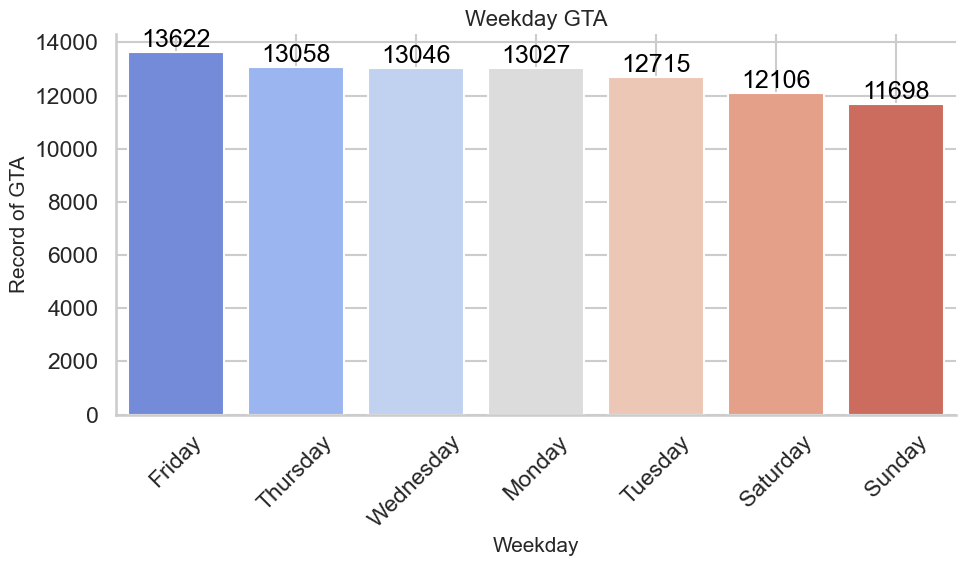

In [236]:
fig = go.Figure()

years = pivot_table.index.get_level_values('Year').unique()

total_crimes_per_year = {}

visibility = [False] * len(years)
visibility[0] = True  

for i, year in enumerate(years):
    heatmap_data = pivot_table.xs(key=year, level='Year').values
    total_crimes = heatmap_data.sum()  
    total_crimes_per_year[year] = total_crimes 
    
    heatmap_data = pivot_table.xs(key=year, level='Year').values
    fig.add_trace(
        go.Heatmap(
            z=heatmap_data,
            x=[f"{hour:02d}:00" for hour in range(24)],  
            y=[month_abbr[month] for month in range(1, 13)],  
            colorscale='YlOrRd',
            name=str(year),
            visible=visibility[i]
        )
    )

buttons = []
for i, year in enumerate(years):
    visibility = [False] * len(years)
    visibility[i] = True

    button = dict(
        label=f"{year}. ({total_crimes_per_year[year]})",
        method='update',
        args=[{'visible': visibility},
              {'title': f'GTA Crimes Heatmap for {year}, total crimes {total_crimes_per_year[year]}',
               'xaxis': {'title': 'Hour of the Day'},
               'yaxis': {'title': 'Month'}}]
    )
    buttons.append(button)
initial_year = years[0]
initial_title = f"GTA Incidents Heatmap for {initial_year} (Total: {total_crimes_per_year[initial_year]:,})"
fig.update_layout(title=initial_title)
fig.update_layout(
    updatemenus=[{
        'type': 'dropdown',
        'direction': 'down',
        'x': 0.5,
        'y': 1.15,
        'showactive': True,
        'active': 0,
        'buttons': buttons
    }],
    xaxis=dict(title='Hour of the Day', tickvals=list(range(24))),
    yaxis=dict(title='Month', tickvals=list(range(0, 13))),
    margin=dict(l=20, r=20, t=100, b=20),
    annotations=[{
        "text": f"Max Year: {max_year} (Total: {yearly_totals[max_year]:,})<br>"
                f"Max Month: {month_abbr[max_month]} (Total: {monthly_totals[max_month]:,})<br>"
                f"Max Hour: {max_hour}:00 (Total: {hourly_totals[max_hour]:,})",
        "align": "left",
        "showarrow": False,
        "xref": "paper",
        "yref": "paper",
        "x": 0.7,
        "y": 1.2,
        "xanchor": "left",
        "yanchor": "middle",
        "font": {"size": 12}
    }]

)

fig.show()
barplot_df(gta_crimes_day,"Date","count","Weekday GTA","Weekday","Record of GTA","count")


GTA crimes is most frequent at 22:00 mostly after that it would be around 00:00 in the most years. month where it occurs the most is July due to it is summertimes, the warm weather could affect how people think and it is when most are outside. Year it happend most is 2011 and then the weekday is Friday could be because of influence under drugs, the next they it is the weekend. They maybe take out their anger for the week or it is just simplier

---

# 9. Just send me like location

https://www.youtube.com/watch?v=k7yBJ5Ffkdo

**9.1** Are there any (geographical) areas hit particularly hard by prostitution on friday nights?

In [237]:
chicago_prostitution_08_to_12_df= chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Primary Type"] == "PROSTITUTION"]
chicago_prostitution_friday_08_to_12_df = chicago_prostitution_08_to_12_df[pd.DatetimeIndex(chicago_prostitution_08_to_12_df["Date"]).day_name() == "Friday"]

In [238]:
chicago_prostitution_location_friday_08_to_12_df =pd.DataFrame(chicago_prostitution_friday_08_to_12_df["Block"].value_counts()).reset_index()

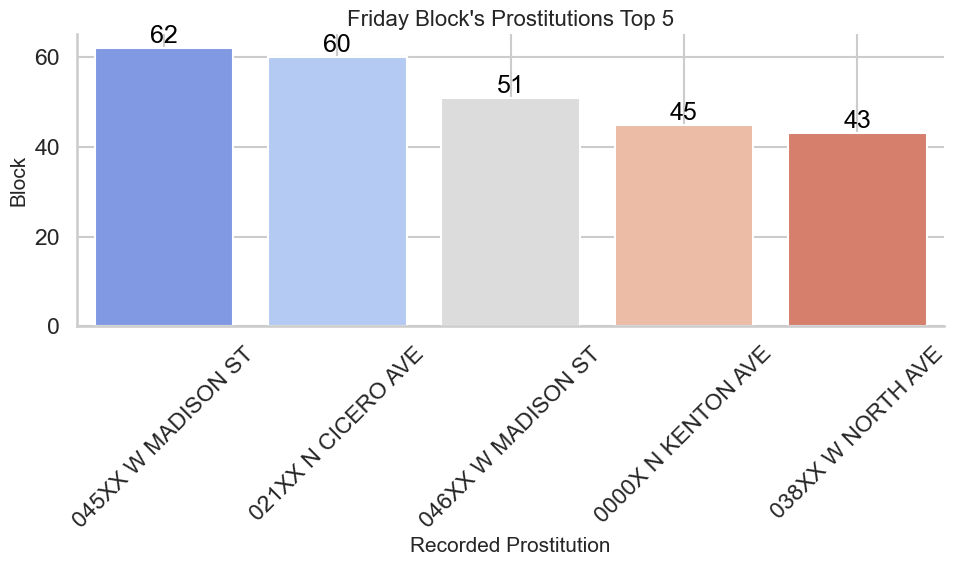

In [239]:
barplot_df(chicago_prostitution_location_friday_08_to_12_df.head(),"Block","count","Friday Block's Prostitutions Top 5","Recorded Prostitution","Block","count")

---

**9.2*** Can you vizualise the locations from 9.1 on a map of Chicago? Is there a concentration somewhere? 

In [240]:
crime_counts = chicago_prostitution_08_to_12_df.groupby(["Case Number","Date","Block",'Latitude', 'Longitude',"Location Description","Description",]).size().reset_index(name='crime_count')


In [241]:
crimes_in_same_area = crime_counts.groupby(['Latitude', 'Longitude',"Block"]).apply(
    lambda x: ' <br>'.join(f"{row['Case Number']}: {row['Date'].strftime('%Y-%m-%d %I:%M:%S %p')} - {row['Location Description']} - {row['Description']} " for _, row in x.iterrows())
).reset_index(name='Text')

In [242]:
fig = px.density_mapbox(crimes_in_same_area, lat="Latitude", lon="Longitude",hover_name="Block", hover_data="Text",
                        zoom=8.5, height=300,radius=3,center=dict(lat=41.8781, lon=-87.6298),mapbox_style="stamen-terrain", color_continuous_scale='Viridis',opacity=0.7)

fig.update_layout(mapbox_style="open-street-map",title="Friday Prostotution")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(title={
    'text': "Friday Prostitution's",
    'y':0.9,
    'x':0.5,
    
    'xanchor': 'center',
    'yanchor': 'top',
    "font": {"size":50},
    }
    
                  )

fig.show()

---

**9.3*** Can you find any geographical concentration of other crime categories? Perhaps even by weekday and or day/nighttime or certain dates of the year? Plot these on a map of Chicago. 

In [243]:
januari_crimes= chicago_crime_2008_to_2012_df

In [244]:
januari_crimes['Month'] = januari_crimes['Date'].dt.month
januari_crimes['Day'] = januari_crimes['Date'].dt.day


In [245]:
jan_first_crimes = januari_crimes[(januari_crimes['Month'] == 1) & (januari_crimes['Day'] == 1)]


In [246]:
fig = px.density_mapbox(jan_first_crimes, lat="Latitude", lon="Longitude",hover_name="Block", hover_data=["Case Number","Primary Type","Location Description","Description"], 
                        zoom=8.5, height=300,radius=3,center=dict(lat=41.8781, lon=-87.6298),mapbox_style="stamen-terrain", color_continuous_scale='Viridis',opacity=0.7)

fig.update_layout(mapbox_style="open-street-map",title="Friday Prostotution")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(title={
    'text': "First Januari crimes ",
    'y':0.9,
    'x':0.5,
    
    'xanchor': 'center',
    'yanchor': 'top',
    "font": {"size":50},
    }
    
                  )

fig.show()

I choose to plot the 1 JAnuary becasue it is the top day where crime occur, Giving more details on where it is happening

---

# 10 - The $ factor

**10.1** Merge the crime and census datasets together in a suitable way.

In [247]:
chicago_crime_and_census_08_12_df=pd.merge(chicago_crime_2008_to_2012_df,chicago_census_2008_to_2012_df, left_on="Community Area", right_on="Community Area Number")

In [251]:
chicago_crime_and_census_08_12_df.head(3)

ID Case Number                Date                 Block  IUCR  \
0  11645833    JC213044 2012-05-05 12:25:00       057XX W OHIO ST  1153   
1  11610104    JC169694 2012-11-13 00:00:00  010XX N MAYFIELD AVE  1153   
2  11610666    JC169916 2010-06-01 02:00:00    049XX W MADISON ST  1153   

         Primary Type                          Description  \
0  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
1  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
2  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   

  Location Description  Arrest  Domestic  ...  Day  Community Area Number  \
0                  NaN   False     False  ...    5                   25.0   
1            RESIDENCE   False     False  ...   13                   25.0   
2                  NaN   False     False  ...    1                   25.0   

   COMMUNITY AREA NAME  PERCENT OF HOUSING CROWDED  \
0               Austin                         6.3   
1               Austin                         6.3   
2               Austin                         6.3   

  PERCENT HOUSEHOLDS BELOW POVERTY  PERCENT AGED 16+ UNEMPLOYED  \
0                             28.6                         22.6   
1                             28.6                         22.6   
2                             28.6                         22.6   

   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  \
0                                          24.4   
1                                          24.4   
2                                          24.4   

   PERCENT AGED UNDER 18 OR OVER 64 PER CAPITA INCOME   HARDSHIP INDEX  
0                              37.9              15957            73.0  
1                              37.9              15957            73.0  
2                              37.9              15957            73.0  

[3 rows x 33 columns]

---

**10.2*** Are there certain kinds of socoeconomic area that are more prone to certain kinds of crimes? Do a deep dive in the direction you fancy yourself here.

---

# 11 - Spotligt on you, Maestro!

There are obviously so much more to gain by analysing these datasets. This is now your opportunity to dwelve deeper into what you yourself like. Recall that the census data contributed with **alot** of dimensions.

    Instructions: think of one or several questions (as we've done above). Then, proceed with your own deep dive analysis and provide your answers.

----

# 12 - A moment of reflection

**12.1** Looking back at the analysis that you've done, what do you think about it? Specifically, how reliable are your conclusions? Is there anything that could be done to improve the factuality of the analysis? If so, what?

Reflecting on my work, I believe my conclusions are reliable because they are based on the available data, and I have strived to substantiate my points with this information. One limitation is that while I can present the numbers, I cannot always provide the reasons behind them, which would offer a deeper understanding of the underlying issues.

It was not fun to see the large numbers associated with various types of crime, particularly those involving children, which was unexpected. However, it is encouraging that by the end of 2012, there was a noticeable decrease in both the occurrence and percentage of many crimes. Some crimes did show increases of about 300%, which seems significant, but the actual count may have risen from just one to three incidents. While this is a substantial increase percentage-wise, the absolute numbers remain small. Conversely, a 50% reduction in larger crime categories could represent a significant numerical decrease, such as halving 3,000 incidents to 1,500. This illustrates how perspectives can shift when considering percentages versus actual numbers. In fact, I tend to rely more on the concrete figures since, in the end, this is a numbers game.

Another interesting observation was that most crimes were recorded at 00:00, which initially led me to suspect that police officers might be defaulting to this time when the actual time of the crime was unknown. However, upon examining the top 10 worst dates for each year, I discovered that many instances of 00:00 corresponded with New Year's Eve, which clarified the spike in criminal activity at that time. The change in time format to include the hour was enlightening and helped piece together the puzzle, offering a rationale for the patterns observed.

In 2009, there was a marked decrease in crime, starting around November 2008. I speculate that this could be related to President Obama's election or the financial crisis that occurred around September. These events might have influenced crime rates, but it's not definitive. The introduction of new police policies or other factors could also have played a role. Given the multifaceted nature of crime statistics, various events could have impacted the numbers.

There are shortcomings in the data, such as the presence of NaN values in the location field, which suggests that some crime records may lack detail and accuracy. This points to the possibility of data collection issues, although this is not a confirmed conclusion but merely an alternative perspective.

Additionally, incorporating ethnicity data, such as Hispanic, Caucasian, Asian, or African American demographics mentioned in police reports, could provide a more comprehensive view of crime patterns. However, this type of sensitive information must be handled with care to maintain individual privacy and data protection, especially since it could potentially identify those involved in the crimes.

It is also challenging to make definitive statements about the increase or decrease of crime in Chicago based solely on the 2008-2012 period since data up to 2023, which we haven't included, might show a different trend. Hence, it is crucial to clearly specify the time frame of the data analyzed to avoid misrepresenting the information.

I want to express my gratitude for this opportunity to engage in an extensive project. I feel that I've gained significant new insights into data handling. To say I've mastered it would be an overstatement; there's always more to learn. Nonetheless, I believe I have emerged from this experience with enhanced knowledge, and for that, I am truly appreciative. Thank you for dedicating your time to creating this valuable exercise.







---